NameError: name 'segment_performance' is not defined

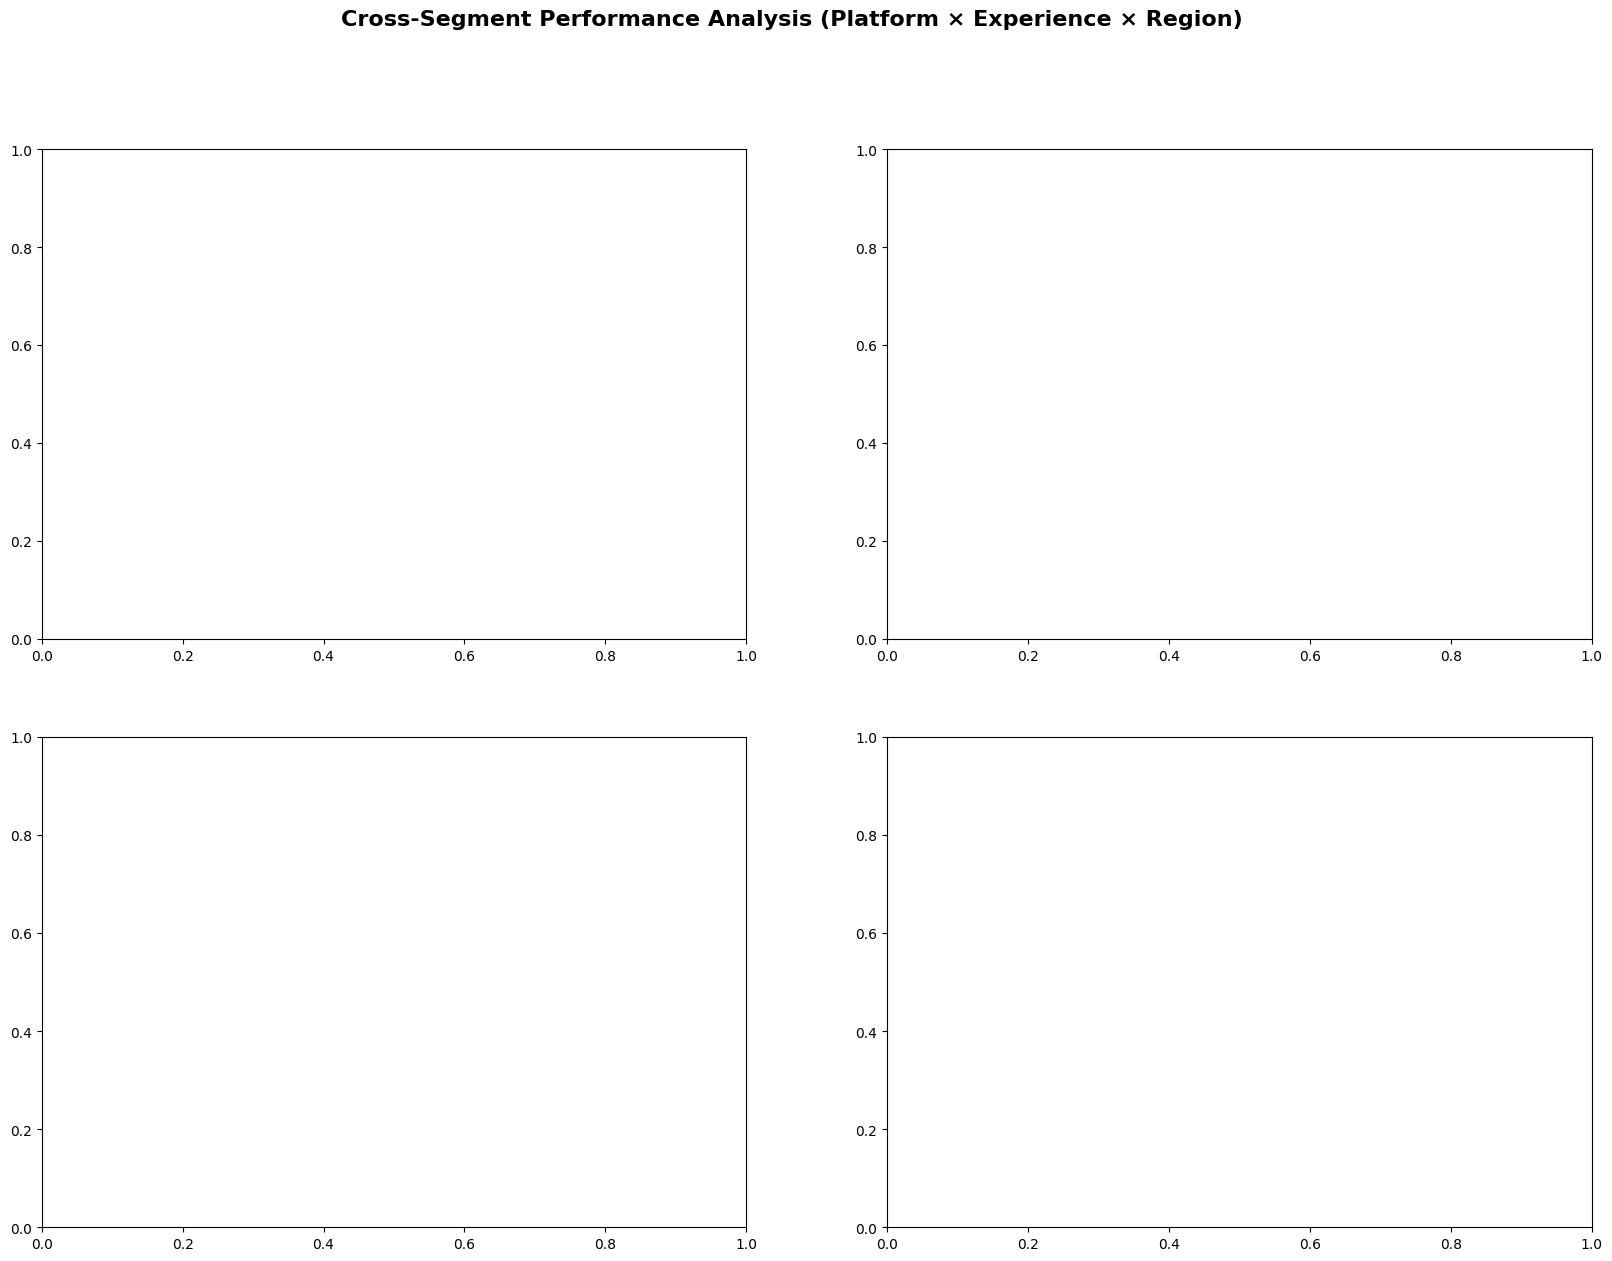

In [48]:
# Cross-Segment Performance Visualization
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle('Cross-Segment Performance Analysis (Platform × Experience × Region)', fontsize=16, fontweight='bold')

# Heatmap: Platform vs Experience (Success Rate)
platform_exp_pivot = segment_performance.pivot_table(
    values='success_rate', 
    index='platform', 
    columns='experience', 
    aggfunc='mean'
).fillna(0)

im1 = axes[0,0].imshow(platform_exp_pivot.values, cmap='RdYlGn', aspect='auto', vmin=0, vmax=50)
axes[0,0].set_title('Success Rate: Platform vs Experience')
axes[0,0].set_xticks(range(len(platform_exp_pivot.columns)))
axes[0,0].set_xticklabels(platform_exp_pivot.columns)
axes[0,0].set_yticks(range(len(platform_exp_pivot.index)))
axes[0,0].set_yticklabels(platform_exp_pivot.index)

# Add text annotations
for i in range(len(platform_exp_pivot.index)):
    for j in range(len(platform_exp_pivot.columns)):
        text = axes[0,0].text(j, i, f'{platform_exp_pivot.iloc[i, j]:.1f}%',
                             ha="center", va="center", color="black", fontweight='bold')

plt.colorbar(im1, ax=axes[0,0], label='Success Rate (%)')

# Heatmap: Platform vs Region (Success Rate)
platform_region_pivot = segment_performance.pivot_table(
    values='success_rate', 
    index='platform', 
    columns='region', 
    aggfunc='mean'
).fillna(0)

im2 = axes[0,1].imshow(platform_region_pivot.values, cmap='RdYlGn', aspect='auto', vmin=0, vmax=50)
axes[0,1].set_title('Success Rate: Platform vs Region')
axes[0,1].set_xticks(range(len(platform_region_pivot.columns)))
axes[0,1].set_xticklabels(platform_region_pivot.columns)
axes[0,1].set_yticks(range(len(platform_region_pivot.index)))
axes[0,1].set_yticklabels(platform_region_pivot.index)

# Add text annotations
for i in range(len(platform_region_pivot.index)):
    for j in range(len(platform_region_pivot.columns)):
        text = axes[0,1].text(j, i, f'{platform_region_pivot.iloc[i, j]:.1f}%',
                             ha="center", va="center", color="black", fontweight='bold')

plt.colorbar(im2, ax=axes[0,1], label='Success Rate (%)')

# Top and Bottom Performing Segments
top_segments = significant_segments.head(8)
bottom_segments = significant_segments.tail(8)

# Top performers
y_pos = np.arange(len(top_segments))
segment_labels = [f"{row['platform'][:3]}|{row['experience'][:3]}|{row['region'][:6]}" 
                 for _, row in top_segments.iterrows()]

bars1 = axes[1,0].barh(y_pos, top_segments['success_rate'], color=wise_colors[0])
axes[1,0].set_title('Top Performing Segments (Success Rate)')
axes[1,0].set_xlabel('Success Rate (%)')
axes[1,0].set_yticks(y_pos)
axes[1,0].set_yticklabels(segment_labels)

# Add value labels
for i, (bar, rate) in enumerate(zip(bars1, top_segments['success_rate'])):
    width = bar.get_width()
    axes[1,0].text(width + 1, bar.get_y() + bar.get_height()/2.,
                  f'{rate:.1f}%', ha='left', va='center')

# Bottom performers
y_pos = np.arange(len(bottom_segments))
segment_labels = [f"{row['platform'][:3]}|{row['experience'][:3]}|{row['region'][:6]}" 
                 for _, row in bottom_segments.iterrows()]

bars2 = axes[1,1].barh(y_pos, bottom_segments['success_rate'], color=wise_colors[4])
axes[1,1].set_title('Bottom Performing Segments (Success Rate)')
axes[1,1].set_xlabel('Success Rate (%)')
axes[1,1].set_yticks(y_pos)
axes[1,1].set_yticklabels(segment_labels)

# Add value labels
for i, (bar, rate) in enumerate(zip(bars2, bottom_segments['success_rate'])):
    width = bar.get_width()
    axes[1,1].text(width + 0.5, bar.get_y() + bar.get_height()/2.,
                  f'{rate:.1f}%', ha='left', va='center')

plt.tight_layout()
plt.savefig('exports/cross_segment_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Create segment summary table
print("\\n=== SEGMENT PERFORMANCE SUMMARY ===")
summary_stats = {
    'Total Segments': len(segment_performance),
    'Significant Segments (≥10th percentile volume)': len(significant_segments),
    'Best Success Rate': f"{significant_segments['success_rate'].max():.1f}%",
    'Worst Success Rate': f"{significant_segments['success_rate'].min():.1f}%",
    'Average Success Rate': f"{significant_segments['success_rate'].mean():.1f}%",
    'Success Rate Std Dev': f"{significant_segments['success_rate'].std():.1f}%"
}

for key, value in summary_stats.items():
    print(f"{key}: {value}")

print("\\n✅ All segment visualizations exported to exports/")
print("📊 Platform analysis: exports/platform_analysis_detailed.png")
print("👥 Experience analysis: exports/experience_analysis_detailed.png") 
print("🌍 Regional analysis: exports/regional_analysis_detailed.png")
print("🔄 Cross-segment analysis: exports/cross_segment_analysis.png")

In [ ]:
# Cross-Segment Analysis - Platform x Experience x Region
print("=== CROSS-SEGMENT ANALYSIS ===")

# Create comprehensive segment combinations
segment_performance = transfers_df.groupby(['platform', 'experience', 'region']).agg({
    'status': ['count', lambda x: (x == 'settled').mean() * 100, lambda x: (x == 'unsettled').mean() * 100],
    'transfer_id': 'count'
}).round(1)

segment_performance.columns = ['total_transfers', 'success_rate', 'friction_rate', 'transfer_count']
segment_performance = segment_performance.reset_index()

# Sort by success rate for better insights
segment_performance = segment_performance.sort_values('success_rate', ascending=False)

print("Top 10 Performing Segments (by Success Rate):")
print("="*60)
for idx, row in segment_performance.head(10).iterrows():
    print(f"{row['platform']} | {row['experience']} | {row['region']}")
    print(f"  Transfers: {row['total_transfers']:<6} Success: {row['success_rate']:<5.1f}% Friction: {row['friction_rate']:<5.1f}%")
    print()

print("Bottom 10 Performing Segments (by Success Rate):")
print("="*60)
for idx, row in segment_performance.tail(10).iterrows():
    print(f"{row['platform']} | {row['experience']} | {row['region']}")
    print(f"  Transfers: {row['total_transfers']:<6} Success: {row['success_rate']:<5.1f}% Friction: {row['friction_rate']:<5.1f}%")
    print()

# Calculate segment volumes for filtering
min_volume_threshold = segment_performance['total_transfers'].quantile(0.1)  # Only segments with meaningful volume
significant_segments = segment_performance[segment_performance['total_transfers'] >= min_volume_threshold]

print(f"Analyzing {len(significant_segments)} segments with ≥{min_volume_threshold:.0f} transfers")
print(f"Best performing segment: {significant_segments.iloc[0]['platform']} | {significant_segments.iloc[0]['experience']} | {significant_segments.iloc[0]['region']} ({significant_segments.iloc[0]['success_rate']:.1f}% success)")
print(f"Worst performing segment: {significant_segments.iloc[-1]['platform']} | {significant_segments.iloc[-1]['experience']} | {significant_segments.iloc[-1]['region']} ({significant_segments.iloc[-1]['success_rate']:.1f}% success)")

# Save comprehensive segment analysis
segment_performance.to_csv('src/cross_segment_performance.csv', index=False)
print("\\n✅ Cross-segment analysis exported to src/cross_segment_performance.csv")

In [ ]:
# Regional Performance Visualization
fig, axes = plt.subplots(3, 2, figsize=(18, 16))
fig.suptitle('Regional Performance Analysis - Daily Trends (7-Day MA)', fontsize=16, fontweight='bold')

region_colors = [wise_colors[i] for i in range(len(regions))]

# Success Rate Trends by Region
ax = axes[0,0]
for i, (region, metrics) in enumerate(region_metrics.items()):
    if len(metrics['success_ma7']) > 0:
        ax.plot(metrics['success_ma7'].index, metrics['success_ma7'].values, 
               linewidth=2, color=region_colors[i], label=region, marker='o', markersize=2)
ax.set_title('Success Rate Trends by Region')
ax.set_ylabel('Success Rate (%)')
ax.legend()
ax.grid(True, alpha=0.3)
ax.tick_params(axis='x', rotation=45)

# Friction Rate Trends by Region
ax = axes[0,1]
for i, (region, metrics) in enumerate(region_metrics.items()):
    if len(metrics['friction_ma7']) > 0:
        ax.plot(metrics['friction_ma7'].index, metrics['friction_ma7'].values, 
               linewidth=2, color=region_colors[i], label=region, marker='s', markersize=2)
ax.set_title('Friction Rate Trends by Region')
ax.set_ylabel('Friction Rate (%)')
ax.legend()
ax.grid(True, alpha=0.3)
ax.tick_params(axis='x', rotation=45)

# Daily Volume by Region
ax = axes[1,0]
for i, (region, metrics) in enumerate(region_metrics.items()):
    if len(metrics['daily_volume']) > 0:
        ax.plot(metrics['daily_volume'].index, metrics['daily_volume'].values, 
               linewidth=1.5, color=region_colors[i], label=region, alpha=0.7)
ax.set_title('Daily Transfer Volume by Region')
ax.set_ylabel('Daily Transfers')
ax.legend()
ax.grid(True, alpha=0.3)
ax.tick_params(axis='x', rotation=45)

# Regional Performance Summary
ax = axes[1,1]
regions_list = list(region_metrics.keys())
region_success_rates = [region_metrics[r]['latest_success_ma7'] for r in regions_list]
region_friction_rates = [region_metrics[r]['latest_friction_ma7'] for r in regions_list]

x = np.arange(len(regions_list))
width = 0.35

bars1 = ax.bar(x - width/2, region_success_rates, width, label='Success Rate', color=wise_colors[0])
bars2 = ax.bar(x + width/2, region_friction_rates, width, label='Friction Rate', color=wise_colors[4])

ax.set_title('Latest Performance by Region (7-day MA)')
ax.set_ylabel('Rate (%)')
ax.set_xticks(x)
ax.set_xticklabels(regions_list)
ax.legend()

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1,
               f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

# Regional Market Size
ax = axes[2,0]
region_volumes = [region_metrics[r]['total_transfers'] for r in regions_list]
bars = ax.bar(regions_list, region_volumes, color=region_colors[:len(regions_list)])
ax.set_title('Total Transfer Volume by Region')
ax.set_ylabel('Total Transfers')
ax.tick_params(axis='x', rotation=0)

for bar, volume in zip(bars, region_volumes):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + max(region_volumes)*0.01,
           f'{volume:,}', ha='center', va='bottom')

# Regional Partial Settlement Analysis
ax = axes[2,1]
for i, (region, metrics) in enumerate(region_metrics.items()):
    if len(metrics['partial_ma7']) > 0:
        ax.plot(metrics['partial_ma7'].index, metrics['partial_ma7'].values, 
               linewidth=2, color=region_colors[i], label=region, marker='^', markersize=2)
ax.set_title('Partial Settlement Rate Trends by Region')
ax.set_ylabel('Partial Settlement Rate (%)')
ax.legend()
ax.grid(True, alpha=0.3)
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('exports/regional_analysis_detailed.png', dpi=300, bbox_inches='tight')
plt.show()

# Export regional metrics
regional_summary = pd.DataFrame({
    'region': regions_list,
    'total_transfers': region_volumes,
    'avg_daily_volume': [region_metrics[r]['avg_daily_volume'] for r in regions_list],
    'latest_success_rate_7ma': region_success_rates,
    'latest_friction_rate_7ma': region_friction_rates,
    'latest_partial_rate_7ma': [region_metrics[r]['partial_ma7'].iloc[-1] if len(region_metrics[r]['partial_ma7']) > 0 else 0 for r in regions_list]
})
regional_summary.to_csv('src/regional_performance_summary.csv', index=False)
print("✅ Regional analysis exported to src/regional_performance_summary.csv")

In [ ]:
# Detailed Regional Analysis - Daily Performance with 7-Day MA
print("=== REGIONAL ANALYSIS - DAILY PERFORMANCE ===")

# Get all unique regions
regions = transfers_df['region'].unique()
region_metrics = {}

for region in regions:
    region_data = transfers_df[transfers_df['region'] == region]
    region_daily = region_data.groupby('date')
    
    # Daily metrics
    daily_region_status = region_daily['status'].value_counts().unstack(fill_value=0)
    daily_region_totals = region_daily.size()
    
    if len(daily_region_totals) > 0:
        # Calculate rates
        success_rate = (daily_region_status.get('settled', 0) / daily_region_totals * 100)
        partial_rate = (daily_region_status.get('partially_settled', 0) / daily_region_totals * 100)
        friction_rate = (daily_region_status.get('unsettled', 0) / daily_region_totals * 100)
        
        # 7-day moving averages
        success_ma7 = success_rate.rolling(window=7, min_periods=1).mean()
        partial_ma7 = partial_rate.rolling(window=7, min_periods=1).mean()
        friction_ma7 = friction_rate.rolling(window=7, min_periods=1).mean()
        
        region_metrics[region] = {
            'daily_volume': daily_region_totals,
            'success_rate': success_rate,
            'success_ma7': success_ma7,
            'partial_rate': partial_rate,
            'partial_ma7': partial_ma7,
            'friction_rate': friction_rate,
            'friction_ma7': friction_ma7,
            'total_transfers': len(region_data),
            'avg_daily_volume': daily_region_totals.mean(),
            'latest_success_ma7': success_ma7.iloc[-1] if len(success_ma7) > 0 else 0,
            'latest_friction_ma7': friction_ma7.iloc[-1] if len(friction_ma7) > 0 else 0
        }

print("Regional Performance Summary (Latest 7-day MA):")
for region, metrics in region_metrics.items():
    print(f"{region}:")
    print(f"  Total transfers: {metrics['total_transfers']:,}")
    print(f"  Avg daily volume: {metrics['avg_daily_volume']:.1f}")
    print(f"  Success rate (7-day MA): {metrics['latest_success_ma7']:.1f}%")
    print(f"  Friction rate (7-day MA): {metrics['latest_friction_ma7']:.1f}%")
    print()

In [ ]:
# Experience Performance Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Customer Experience Performance Analysis - Daily Trends (7-Day MA)', fontsize=16, fontweight='bold')

experience_colors = [wise_colors[0], wise_colors[3]]  # Different colors for New vs Existing

# Success Rate Trends by Experience
ax = axes[0,0]
for i, (experience, metrics) in enumerate(experience_metrics.items()):
    if len(metrics['success_ma7']) > 0:
        ax.plot(metrics['success_ma7'].index, metrics['success_ma7'].values, 
               linewidth=3, color=experience_colors[i], label=experience, marker='o', markersize=3)
ax.set_title('Success Rate Trends by Customer Experience')
ax.set_ylabel('Success Rate (%)')
ax.legend()
ax.grid(True, alpha=0.3)
ax.tick_params(axis='x', rotation=45)

# Friction Rate Trends by Experience  
ax = axes[0,1]
for i, (experience, metrics) in enumerate(experience_metrics.items()):
    if len(metrics['friction_ma7']) > 0:
        ax.plot(metrics['friction_ma7'].index, metrics['friction_ma7'].values, 
               linewidth=3, color=experience_colors[i], label=experience, marker='s', markersize=3)
ax.set_title('Friction Rate Trends by Customer Experience')
ax.set_ylabel('Friction Rate (%)')
ax.legend()
ax.grid(True, alpha=0.3)
ax.tick_params(axis='x', rotation=45)

# Experience Performance Comparison
ax = axes[1,0]
experiences_list = list(experience_metrics.keys())
exp_success_rates = [experience_metrics[e]['latest_success_ma7'] for e in experiences_list]
exp_friction_rates = [experience_metrics[e]['latest_friction_ma7'] for e in experiences_list]

x = np.arange(len(experiences_list))
width = 0.35

bars1 = ax.bar(x - width/2, exp_success_rates, width, label='Success Rate', color=wise_colors[0])
bars2 = ax.bar(x + width/2, exp_friction_rates, width, label='Friction Rate', color=wise_colors[4])

ax.set_title('Latest Performance by Customer Experience (7-day MA)')
ax.set_ylabel('Rate (%)')
ax.set_xticks(x)
ax.set_xticklabels(experiences_list)
ax.legend()

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1,
               f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

# Daily Volume by Experience
ax = axes[1,1]
for i, (experience, metrics) in enumerate(experience_metrics.items()):
    if len(metrics['daily_volume']) > 0:
        ax.plot(metrics['daily_volume'].index, metrics['daily_volume'].values, 
               linewidth=2, color=experience_colors[i], label=experience, alpha=0.8)
ax.set_title('Daily Transfer Volume by Customer Experience')
ax.set_ylabel('Daily Transfers')
ax.legend()
ax.grid(True, alpha=0.3)
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('exports/experience_analysis_detailed.png', dpi=300, bbox_inches='tight')
plt.show()

# Export experience metrics
experience_summary = pd.DataFrame({
    'experience': experiences_list,
    'total_transfers': [experience_metrics[e]['total_transfers'] for e in experiences_list],
    'avg_daily_volume': [experience_metrics[e]['avg_daily_volume'] for e in experiences_list],
    'latest_success_rate_7ma': exp_success_rates,
    'latest_friction_rate_7ma': exp_friction_rates
})
experience_summary.to_csv('src/experience_performance_summary.csv', index=False)
print("✅ Experience analysis exported to src/experience_performance_summary.csv")

In [ ]:
# Detailed Experience Analysis - Daily Performance with 7-Day MA
print("=== EXPERIENCE ANALYSIS - DAILY PERFORMANCE ===")

# Get all unique experiences
experiences = transfers_df['experience'].unique()
experience_metrics = {}

for experience in experiences:
    experience_data = transfers_df[transfers_df['experience'] == experience]
    experience_daily = experience_data.groupby('date')
    
    # Daily metrics
    daily_experience_status = experience_daily['status'].value_counts().unstack(fill_value=0)
    daily_experience_totals = experience_daily.size()
    
    if len(daily_experience_totals) > 0:
        # Calculate rates
        success_rate = (daily_experience_status.get('settled', 0) / daily_experience_totals * 100)
        partial_rate = (daily_experience_status.get('partially_settled', 0) / daily_experience_totals * 100)
        friction_rate = (daily_experience_status.get('unsettled', 0) / daily_experience_totals * 100)
        
        # 7-day moving averages
        success_ma7 = success_rate.rolling(window=7, min_periods=1).mean()
        partial_ma7 = partial_rate.rolling(window=7, min_periods=1).mean()
        friction_ma7 = friction_rate.rolling(window=7, min_periods=1).mean()
        
        experience_metrics[experience] = {
            'daily_volume': daily_experience_totals,
            'success_rate': success_rate,
            'success_ma7': success_ma7,
            'partial_rate': partial_rate,
            'partial_ma7': partial_ma7,
            'friction_rate': friction_rate,
            'friction_ma7': friction_ma7,
            'total_transfers': len(experience_data),
            'avg_daily_volume': daily_experience_totals.mean(),
            'latest_success_ma7': success_ma7.iloc[-1] if len(success_ma7) > 0 else 0,
            'latest_friction_ma7': friction_ma7.iloc[-1] if len(friction_ma7) > 0 else 0
        }

print("Experience Performance Summary (Latest 7-day MA):")
for experience, metrics in experience_metrics.items():
    print(f"{experience}:")
    print(f"  Total transfers: {metrics['total_transfers']:,}")
    print(f"  Avg daily volume: {metrics['avg_daily_volume']:.1f}")
    print(f"  Success rate (7-day MA): {metrics['latest_success_ma7']:.1f}%")
    print(f"  Friction rate (7-day MA): {metrics['latest_friction_ma7']:.1f}%")
    print()

In [ ]:
# Platform Performance Visualization
fig, axes = plt.subplots(3, 2, figsize=(18, 16))
fig.suptitle('Platform Performance Analysis - Daily Trends (7-Day MA)', fontsize=16, fontweight='bold')

platform_colors = [wise_colors[i] for i in range(len(platforms))]

# Success Rate Trends by Platform
ax = axes[0,0]
for i, (platform, metrics) in enumerate(platform_metrics.items()):
    if len(metrics['success_ma7']) > 0:
        ax.plot(metrics['success_ma7'].index, metrics['success_ma7'].values, 
               linewidth=2, color=platform_colors[i], label=platform, marker='o', markersize=2)
ax.set_title('Success Rate Trends by Platform')
ax.set_ylabel('Success Rate (%)')
ax.legend()
ax.grid(True, alpha=0.3)
ax.tick_params(axis='x', rotation=45)

# Friction Rate Trends by Platform
ax = axes[0,1]
for i, (platform, metrics) in enumerate(platform_metrics.items()):
    if len(metrics['friction_ma7']) > 0:
        ax.plot(metrics['friction_ma7'].index, metrics['friction_ma7'].values, 
               linewidth=2, color=platform_colors[i], label=platform, marker='s', markersize=2)
ax.set_title('Friction Rate Trends by Platform')
ax.set_ylabel('Friction Rate (%)')
ax.legend()
ax.grid(True, alpha=0.3)
ax.tick_params(axis='x', rotation=45)

# Daily Volume by Platform
ax = axes[1,0]
for i, (platform, metrics) in enumerate(platform_metrics.items()):
    if len(metrics['daily_volume']) > 0:
        ax.plot(metrics['daily_volume'].index, metrics['daily_volume'].values, 
               linewidth=1.5, color=platform_colors[i], label=platform, alpha=0.7)
ax.set_title('Daily Transfer Volume by Platform')
ax.set_ylabel('Daily Transfers')
ax.legend()
ax.grid(True, alpha=0.3)
ax.tick_params(axis='x', rotation=45)

# Platform Performance Summary (Bar Chart)
ax = axes[1,1]
platforms_list = list(platform_metrics.keys())
success_rates = [platform_metrics[p]['latest_success_ma7'] for p in platforms_list]
friction_rates = [platform_metrics[p]['latest_friction_ma7'] for p in platforms_list]

x = np.arange(len(platforms_list))
width = 0.35

bars1 = ax.bar(x - width/2, success_rates, width, label='Success Rate', color=wise_colors[0])
bars2 = ax.bar(x + width/2, friction_rates, width, label='Friction Rate', color=wise_colors[4])

ax.set_title('Latest Performance by Platform (7-day MA)')
ax.set_ylabel('Rate (%)')
ax.set_xticks(x)
ax.set_xticklabels(platforms_list)
ax.legend()

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1,
               f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

# Platform Volume Distribution (Pie Chart Alternative - Stacked Bar)
ax = axes[2,0]
volumes = [platform_metrics[p]['total_transfers'] for p in platforms_list]
bars = ax.bar(platforms_list, volumes, color=platform_colors[:len(platforms_list)])
ax.set_title('Total Transfer Volume by Platform')
ax.set_ylabel('Total Transfers')
ax.tick_params(axis='x', rotation=0)

for bar, volume in zip(bars, volumes):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + max(volumes)*0.01,
           f'{volume:,}', ha='center', va='bottom')

# Platform Trends Comparison (Success vs Friction)
ax = axes[2,1]
for i, (platform, metrics) in enumerate(platform_metrics.items()):
    if len(metrics['success_ma7']) > 0 and len(metrics['friction_ma7']) > 0:
        # Plot success rate
        ax.plot(metrics['success_ma7'].index, metrics['success_ma7'].values, 
               linewidth=2, color=platform_colors[i], label=f'{platform} Success', linestyle='-')
        # Plot friction rate with dashed line
        ax.plot(metrics['friction_ma7'].index, metrics['friction_ma7'].values, 
               linewidth=2, color=platform_colors[i], label=f'{platform} Friction', linestyle='--', alpha=0.7)

ax.set_title('Success vs Friction Rates by Platform')
ax.set_ylabel('Rate (%)')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('exports/platform_analysis_detailed.png', dpi=300, bbox_inches='tight')
plt.show()

# Export platform metrics
platform_summary = pd.DataFrame({
    'platform': platforms_list,
    'total_transfers': volumes,
    'avg_daily_volume': [platform_metrics[p]['avg_daily_volume'] for p in platforms_list],
    'latest_success_rate_7ma': success_rates,
    'latest_friction_rate_7ma': friction_rates
})
platform_summary.to_csv('src/platform_performance_summary.csv', index=False)
print("✅ Platform analysis exported to src/platform_performance_summary.csv")

In [ ]:
# Detailed Platform Analysis - Daily Performance with 7-Day MA
print("=== PLATFORM ANALYSIS - DAILY PERFORMANCE ===")

# Get all unique platforms
platforms = transfers_df['platform'].unique()
platform_metrics = {}

for platform in platforms:
    platform_data = transfers_df[transfers_df['platform'] == platform]
    platform_daily = platform_data.groupby('date')
    
    # Daily metrics
    daily_platform_status = platform_daily['status'].value_counts().unstack(fill_value=0)
    daily_platform_totals = platform_daily.size()
    
    if len(daily_platform_totals) > 0:
        # Calculate rates
        success_rate = (daily_platform_status.get('settled', 0) / daily_platform_totals * 100)
        partial_rate = (daily_platform_status.get('partially_settled', 0) / daily_platform_totals * 100)
        friction_rate = (daily_platform_status.get('unsettled', 0) / daily_platform_totals * 100)
        
        # 7-day moving averages
        success_ma7 = success_rate.rolling(window=7, min_periods=1).mean()
        partial_ma7 = partial_rate.rolling(window=7, min_periods=1).mean()
        friction_ma7 = friction_rate.rolling(window=7, min_periods=1).mean()
        
        platform_metrics[platform] = {
            'daily_volume': daily_platform_totals,
            'success_rate': success_rate,
            'success_ma7': success_ma7,
            'partial_rate': partial_rate,
            'partial_ma7': partial_ma7,
            'friction_rate': friction_rate,
            'friction_ma7': friction_ma7,
            'total_transfers': len(platform_data),
            'avg_daily_volume': daily_platform_totals.mean(),
            'latest_success_ma7': success_ma7.iloc[-1] if len(success_ma7) > 0 else 0,
            'latest_friction_ma7': friction_ma7.iloc[-1] if len(friction_ma7) > 0 else 0
        }

print("Platform Performance Summary (Latest 7-day MA):")
for platform, metrics in platform_metrics.items():
    print(f"{platform}:")
    print(f"  Total transfers: {metrics['total_transfers']:,}")
    print(f"  Avg daily volume: {metrics['avg_daily_volume']:.1f}")
    print(f"  Success rate (7-day MA): {metrics['latest_success_ma7']:.1f}%")
    print(f"  Friction rate (7-day MA): {metrics['latest_friction_ma7']:.1f}%")
    print()

# Wise Regional Expansion Analysis - MXN → USD Route

**Objective**: Evaluate the launch of the new MXN → USD currency route to determine:
1. Whether the launch is on track
2. Possible issues to share with the product team

**Happy Path**: Transfer Created → Transfer Funded → Transfer Transferred

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

warnings.filterwarnings('ignore')

# Wise color palette
wise_colors = [
    '#1A4D3A',  # Wise dark green
    '#2E7D32',  # Medium-dark green
    '#4CAF50',  # Medium green
    '#66BB6A',  # Medium-light green
    '#81C784',  # Light green
    '#A5D6A7',  # Very light green
    '#C8E6C9',  # Pastel green
    '#E8F5E8'   # Almost white green
]

# Set style
plt.style.use('default')
sns.set_palette(wise_colors)

print("Libraries loaded successfully!")

Libraries loaded successfully!


## 1. Data Validation and Initial Exploration

In [ ]:
# Load the dataset
df = pd.read_csv('src/wise_funnel_events.csv')

print("Dataset shape:", df.shape)
print("\nDataset info:")
df.info()
print("\nFirst few rows:")
df.head()

Dataset shape: (73440, 6)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73440 entries, 0 to 73439
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   event_name  73440 non-null  object 
 1   dt          73440 non-null  object 
 2   user_id     73440 non-null  float64
 3   region      73440 non-null  object 
 4   platform    73440 non-null  object 
 5   experience  73440 non-null  object 
dtypes: float64(1), object(5)
memory usage: 3.4+ MB

First few rows:


,event_name,dt,user_id,region,platform,experience
0,Transfer Funded,2024-02-15,1513280.0,NorthAm,iOS,Existing
1,Transfer Funded,2024-02-29,1270052.0,NorthAm,iOS,Existing
2,Transfer Transferred,2024-02-29,1270052.0,NorthAm,iOS,Existing
3,Transfer Funded,2024-02-25,1399835.0,NorthAm,iOS,Existing
4,Transfer Transferred,2024-02-25,1399835.0,NorthAm,iOS,Existing


In [ ]:
# Check for missing data
print("Missing data summary:")
missing_data = df.isnull().sum()
print(missing_data)
print(f"\nPercentage of missing data: {(missing_data.sum() / len(df)) * 100:.2f}%")

# Check data types
print("\nData types:")
print(df.dtypes)

# Convert date column
df['dt'] = pd.to_datetime(df['dt'])
print(f"\nDate range: {df['dt'].min()} to {df['dt'].max()}")
print(f"Analysis period: {(df['dt'].max() - df['dt'].min()).days} days")

Missing data summary:
event_name    0
dt            0
user_id       0
region        0
platform      0
experience    0
dtype: int64

Percentage of missing data: 0.00%

Data types:
event_name     object
dt             object
user_id       float64
region         object
platform       object
experience     object
dtype: object

Date range: 2024-01-01 00:00:00 to 2024-03-01 00:00:00
Analysis period: 60 days


In [ ]:
# Compute basic aggregates
print("=== BASIC AGGREGATES ===")
print(f"Total events: {len(df):,}")
print(f"Unique users: {df['user_id'].nunique():,}")
print(f"Events per user (avg): {len(df) / df['user_id'].nunique():.2f}")

print("\n=== EVENT DISTRIBUTION ===")
event_counts = df['event_name'].value_counts()
for event, count in event_counts.items():
    print(f"{event}: {count:,} ({count/len(df)*100:.1f}%)")

print("\n=== REGION DISTRIBUTION ===")
region_counts = df['region'].value_counts()
for region, count in region_counts.items():
    users = df[df['region'] == region]['user_id'].nunique()
    print(f"{region}: {count:,} events, {users:,} users")

print("\n=== PLATFORM DISTRIBUTION ===")
platform_counts = df['platform'].value_counts()
for platform, count in platform_counts.items():
    users = df[df['platform'] == platform]['user_id'].nunique()
    print(f"{platform}: {count:,} events, {users:,} users")

print("\n=== EXPERIENCE DISTRIBUTION ===")
exp_counts = df['experience'].value_counts()
for exp, count in exp_counts.items():
    users = df[df['experience'] == exp]['user_id'].nunique()
    print(f"{exp}: {count:,} events, {users:,} users")

=== BASIC AGGREGATES ===
Total events: 73,440
Unique users: 40,223
Events per user (avg): 1.83

=== EVENT DISTRIBUTION ===
Transfer Created: 43,070 (58.6%)
Transfer Funded: 19,290 (26.3%)
Transfer Transferred: 11,080 (15.1%)

=== REGION DISTRIBUTION ===
Other: 28,307 events, 15,704 users
Europe: 25,665 events, 15,695 users
NorthAm: 19,468 events, 9,393 users

=== PLATFORM DISTRIBUTION ===
Android: 27,593 events, 15,955 users
iOS: 25,604 events, 13,172 users
Web: 20,243 events, 11,681 users

=== EXPERIENCE DISTRIBUTION ===
New: 39,812 events, 25,234 users
Existing: 33,628 events, 15,808 users


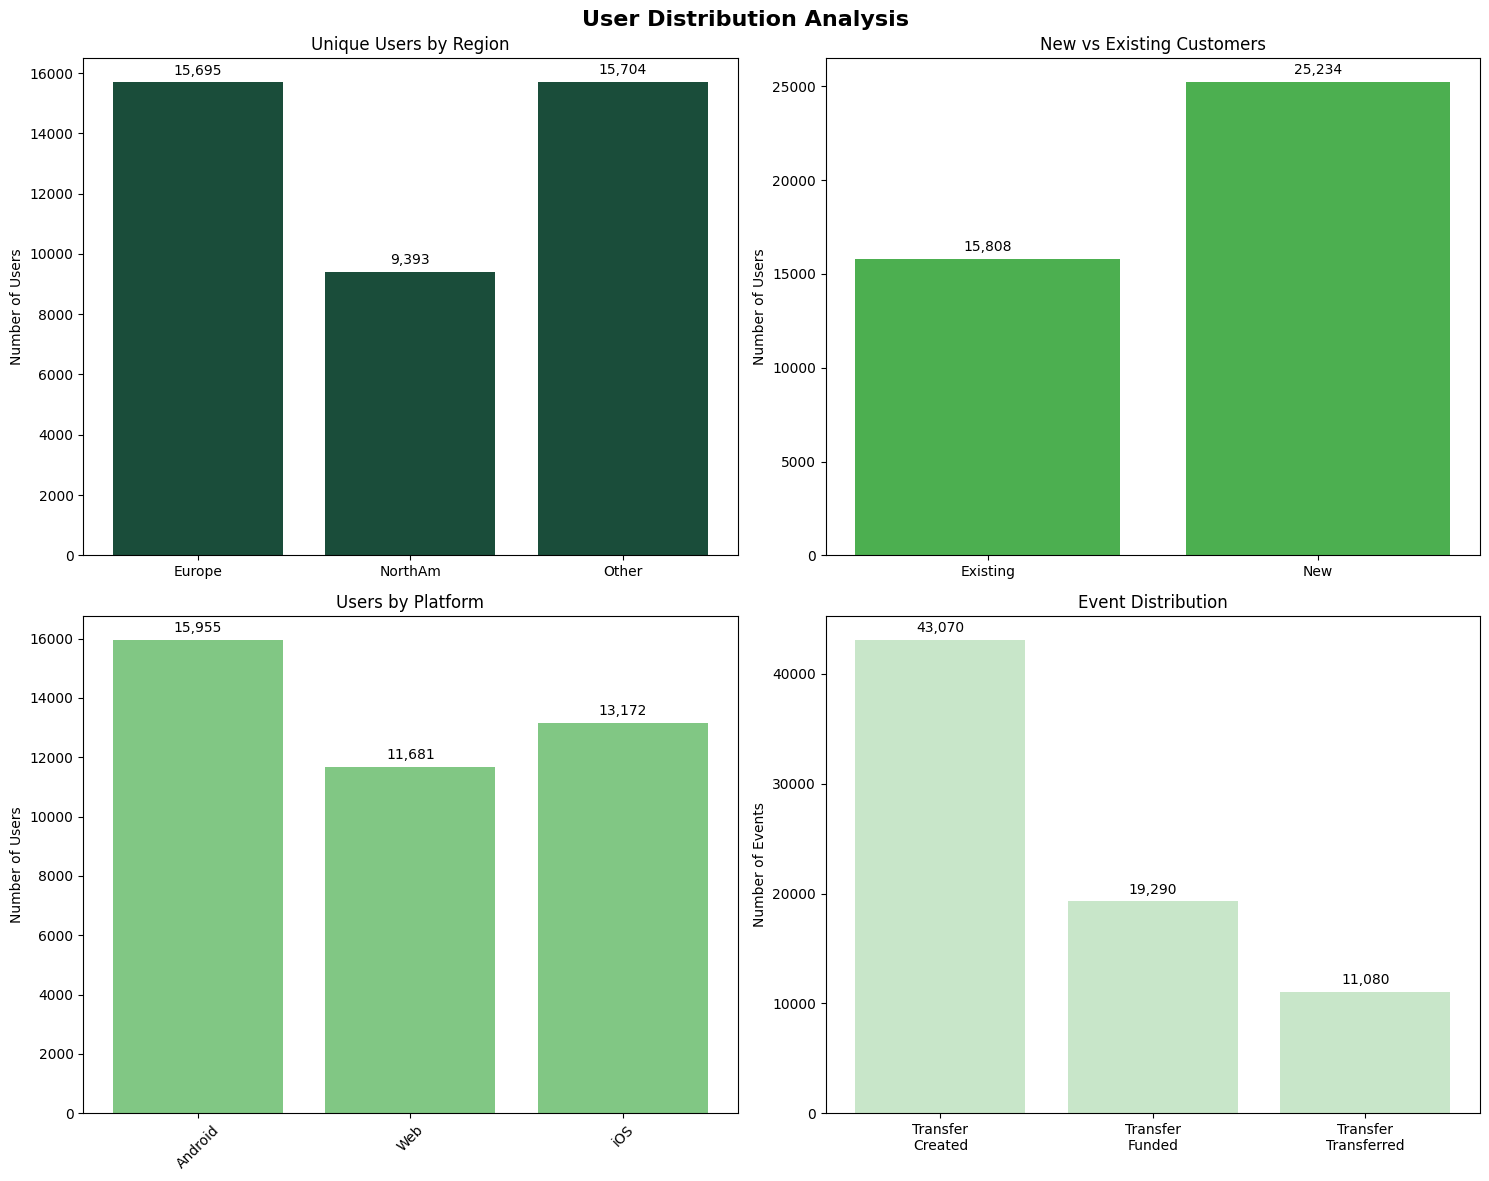

In [ ]:
# Create visualization for user distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('User Distribution Analysis', fontsize=16, fontweight='bold')

# Region distribution
region_users = df.groupby('region')['user_id'].nunique().reset_index()
region_users.columns = ['Region', 'Unique_Users']
axes[0,0].bar(region_users['Region'], region_users['Unique_Users'], color=wise_colors[0])
axes[0,0].set_title('Unique Users by Region')
axes[0,0].set_ylabel('Number of Users')
for i, v in enumerate(region_users['Unique_Users']):
    axes[0,0].text(i, v + max(region_users['Unique_Users'])*0.01, str(f'{v:,}'), 
                   ha='center', va='bottom')

# Experience distribution
exp_users = df.groupby('experience')['user_id'].nunique().reset_index()
exp_users.columns = ['Experience', 'Unique_Users']
axes[0,1].bar(exp_users['Experience'], exp_users['Unique_Users'], color=wise_colors[2])
axes[0,1].set_title('New vs Existing Customers')
axes[0,1].set_ylabel('Number of Users')
for i, v in enumerate(exp_users['Unique_Users']):
    axes[0,1].text(i, v + max(exp_users['Unique_Users'])*0.01, str(f'{v:,}'), 
                   ha='center', va='bottom')

# Platform distribution
platform_users = df.groupby('platform')['user_id'].nunique().reset_index()
platform_users.columns = ['Platform', 'Unique_Users']
axes[1,0].bar(platform_users['Platform'], platform_users['Unique_Users'], color=wise_colors[4])
axes[1,0].set_title('Users by Platform')
axes[1,0].set_ylabel('Number of Users')
axes[1,0].tick_params(axis='x', rotation=45)
for i, v in enumerate(platform_users['Unique_Users']):
    axes[1,0].text(i, v + max(platform_users['Unique_Users'])*0.01, str(f'{v:,}'), 
                   ha='center', va='bottom')

# Event distribution
event_counts = df['event_name'].value_counts()
axes[1,1].bar(range(len(event_counts)), event_counts.values, color=wise_colors[6])
axes[1,1].set_title('Event Distribution')
axes[1,1].set_ylabel('Number of Events')
axes[1,1].set_xticks(range(len(event_counts)))
axes[1,1].set_xticklabels([label.replace(' ', '\n') for label in event_counts.index], rotation=0)
for i, v in enumerate(event_counts.values):
    axes[1,1].text(i, v + max(event_counts.values)*0.01, str(f'{v:,}'), 
                   ha='center', va='bottom')

plt.tight_layout()
plt.savefig('exports/user_distribution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Check for user property consistency
print("=== USER PROPERTY CONSISTENCY CHECK ===")

# Check if users have consistent region, platform, and experience across events
user_consistency = df.groupby('user_id').agg({
    'region': 'nunique',
    'platform': 'nunique', 
    'experience': 'nunique'
}).rename(columns={
    'region': 'unique_regions',
    'platform': 'unique_platforms',
    'experience': 'unique_experiences'
})

inconsistent_region = (user_consistency['unique_regions'] > 1).sum()
inconsistent_platform = (user_consistency['unique_platforms'] > 1).sum()
inconsistent_experience = (user_consistency['unique_experiences'] > 1).sum()

print(f"Users with inconsistent region: {inconsistent_region} ({inconsistent_region/len(user_consistency)*100:.2f}%)")
print(f"Users with inconsistent platform: {inconsistent_platform} ({inconsistent_platform/len(user_consistency)*100:.2f}%)")
print(f"Users with inconsistent experience: {inconsistent_experience} ({inconsistent_experience/len(user_consistency)*100:.2f}%)")

if inconsistent_region > 0:
    print("\n⚠️  WARNING: Some users have events from multiple regions")
if inconsistent_platform > 0:
    print("\n⚠️  WARNING: Some users use multiple platforms")
if inconsistent_experience > 0:
    print("\n⚠️  WARNING: Some users have inconsistent experience labels")

=== USER PROPERTY CONSISTENCY CHECK ===
Users with inconsistent region: 567 (1.41%)
Users with inconsistent platform: 583 (1.45%)
Users with inconsistent experience: 819 (2.04%)

⚠️  WARNING: Some users have events from multiple regions

⚠️  WARNING: Some users use multiple platforms

⚠️  WARNING: Some users have inconsistent experience labels


In [ ]:
# Identify outliers - users with many events
user_event_counts = df['user_id'].value_counts()
print("=== OUTLIER ANALYSIS ===")
print(f"Events per user - Mean: {user_event_counts.mean():.2f}, Median: {user_event_counts.median():.2f}")
print(f"Events per user - 95th percentile: {user_event_counts.quantile(0.95):.0f}")
print(f"Events per user - 99th percentile: {user_event_counts.quantile(0.99):.0f}")
print(f"Max events per user: {user_event_counts.max()}")

# Users with unusually high activity
high_activity_threshold = user_event_counts.quantile(0.95)
high_activity_users = user_event_counts[user_event_counts >= high_activity_threshold]
print(f"\nUsers with {high_activity_threshold:.0f}+ events: {len(high_activity_users)} ({len(high_activity_users)/len(user_event_counts)*100:.2f}%)")

# Show top 10 most active users
print("\nTop 10 most active users:")
for i, (user_id, count) in enumerate(user_event_counts.head(10).items()):
    user_events = df[df['user_id'] == user_id]['event_name'].value_counts()
    print(f"{i+1}. User {user_id}: {count} events - {dict(user_events)}")

=== OUTLIER ANALYSIS ===
Events per user - Mean: 1.83, Median: 1.00
Events per user - 95th percentile: 3
Events per user - 99th percentile: 6
Max events per user: 12

Users with 3+ events: 11039 (27.44%)

Top 10 most active users:
1. User 1586462.0: 12 events - {'Transfer Created': 5, 'Transfer Funded': 4, 'Transfer Transferred': 3}
2. User 1556990.0: 11 events - {'Transfer Funded': 4, 'Transfer Created': 4, 'Transfer Transferred': 3}
3. User 1019293.0: 11 events - {'Transfer Funded': 4, 'Transfer Created': 4, 'Transfer Transferred': 3}
4. User 1771786.0: 11 events - {'Transfer Funded': 4, 'Transfer Created': 4, 'Transfer Transferred': 3}
5. User 1351181.0: 10 events - {'Transfer Created': 4, 'Transfer Funded': 3, 'Transfer Transferred': 3}
6. User 1525096.0: 10 events - {'Transfer Created': 4, 'Transfer Funded': 3, 'Transfer Transferred': 3}
7. User 1228181.0: 10 events - {'Transfer Funded': 4, 'Transfer Created': 4, 'Transfer Transferred': 2}
8. User 1628987.0: 10 events - {'Transfer

## 2. Transfer Categorization - Happy Path Analysis

In [ ]:
# Create transfer sequences for each user - FIXED LOGIC
print("=== TRANSFER CATEGORIZATION ===")

# Sort by user and date to get chronological order
df_sorted = df.sort_values(['user_id', 'dt'])

# Group by user_id and date to handle same-day transfers correctly
transfer_data = []
transfer_id = 1

for (user_id, date), group in df_sorted.groupby(['user_id', df_sorted['dt'].dt.date]):
    # Check what events happened on this day for this user
    events_today = set(group['event_name'].values)
    
    # Count how many "Transfer Created" events (each represents a new transfer)
    created_count = (group['event_name'] == 'Transfer Created').sum()
    
    # For each transfer created on this day
    for i in range(created_count):
        # Get user properties (take first occurrence for the day)
        user_info = group.iloc[0]
        
        transfer_info = {
            'transfer_id': transfer_id,
            'user_id': user_id,
            'region': user_info['region'],
            'platform': user_info['platform'],
            'experience': user_info['experience'],
            'created_date': pd.to_datetime(f"{date}"),
            'transfer_created': True,
            'transfer_funded': False,
            'transfer_transferred': False,
            'status': 'unsettled'
        }
        
        # Check if this transfer progressed through the funnel
        funded_count = (group['event_name'] == 'Transfer Funded').sum()
        transferred_count = (group['event_name'] == 'Transfer Transferred').sum()
        
        # For simplicity, assume transfers progress in order within the same day
        # This handles the most common case where events happen sequentially
        if i < funded_count:
            transfer_info['transfer_funded'] = True
            transfer_info['status'] = 'partially_settled'
            
            if i < transferred_count:
                transfer_info['transfer_transferred'] = True
                transfer_info['status'] = 'settled'
        
        transfer_data.append(transfer_info)
        transfer_id += 1

# Handle orphaned funded/transferred events (events without corresponding "created")
print("Handling orphaned events...")
orphaned_transfers = 0

for (user_id, date), group in df_sorted.groupby(['user_id', df_sorted['dt'].dt.date]):
    events_today = set(group['event_name'].values)
    created_count = (group['event_name'] == 'Transfer Created').sum()
    funded_count = (group['event_name'] == 'Transfer Funded').sum()
    transferred_count = (group['event_name'] == 'Transfer Transferred').sum()
    
    # If we have funded/transferred without created events, create implicit transfers
    if created_count == 0 and (funded_count > 0 or transferred_count > 0):
        # Assume these are transfers that were created on a previous day
        # For analysis purposes, we'll treat funded events as the start
        for i in range(max(funded_count, transferred_count)):
            user_info = group.iloc[0]
            
            transfer_info = {
                'transfer_id': transfer_id,
                'user_id': user_id,
                'region': user_info['region'],
                'platform': user_info['platform'],
                'experience': user_info['experience'],
                'created_date': pd.to_datetime(f"{date}"),  # Use funding date as proxy
                'transfer_created': True,  # Assume it was created
                'transfer_funded': i < funded_count,
                'transfer_transferred': i < transferred_count,
                'status': 'settled' if i < transferred_count else ('partially_settled' if i < funded_count else 'unsettled')
            }
            
            transfer_data.append(transfer_info)
            transfer_id += 1
            orphaned_transfers += 1

transfers_df = pd.DataFrame(transfer_data)
print(f"Total transfers identified: {len(transfers_df)}")
print(f"Orphaned transfers handled: {orphaned_transfers}")

# Status distribution
status_counts = transfers_df['status'].value_counts()
print("\nTransfer status distribution:")
for status, count in status_counts.items():
    print(f"{status}: {count:,} ({count/len(transfers_df)*100:.1f}%)")

# Check date range of transfers
print(f"\nTransfer date range: {transfers_df['created_date'].min()} to {transfers_df['created_date'].max()}")

=== TRANSFER CATEGORIZATION ===
Handling orphaned events...
Total transfers identified: 43340
Orphaned transfers handled: 270

Transfer status distribution:
unsettled: 23,804 (54.9%)
settled: 11,080 (25.6%)
partially_settled: 8,456 (19.5%)

Transfer date range: 2024-01-01 00:00:00 to 2024-03-01 00:00:00


In [ ]:
# Save the transfer info dataframe
transfers_df.to_csv('src/wise_transfer_info.csv', index=False)
print("✅ Transfer info saved to src/wise_transfer_info.csv")

# Display sample of the transfer data
print("\nSample transfer data:")
print(transfers_df.head(10))

✅ Transfer info saved to src/wise_transfer_info.csv

Sample transfer data:
   transfer_id    user_id   region platform experience created_date  \
0            1  1000006.0    Other      Web        New   2024-01-25   
1            2  1000020.0   Europe      iOS   Existing   2024-01-31   
2            3  1000038.0   Europe  Android        New   2024-02-25   
3            4  1000093.0    Other  Android        New   2024-01-13   
4            5  1000127.0    Other  Android        New   2024-02-27   
5            6  1000144.0    Other      iOS        New   2024-01-12   
6            7  1000174.0  NorthAm      Web        New   2024-01-29   
7            8  1000179.0    Other  Android   Existing   2024-02-07   
8            9  1000194.0   Europe  Android   Existing   2024-02-22   
9           10  1000231.0    Other      Web        New   2024-01-19   

   transfer_created  transfer_funded  transfer_transferred             status  
0              True            False                 False     

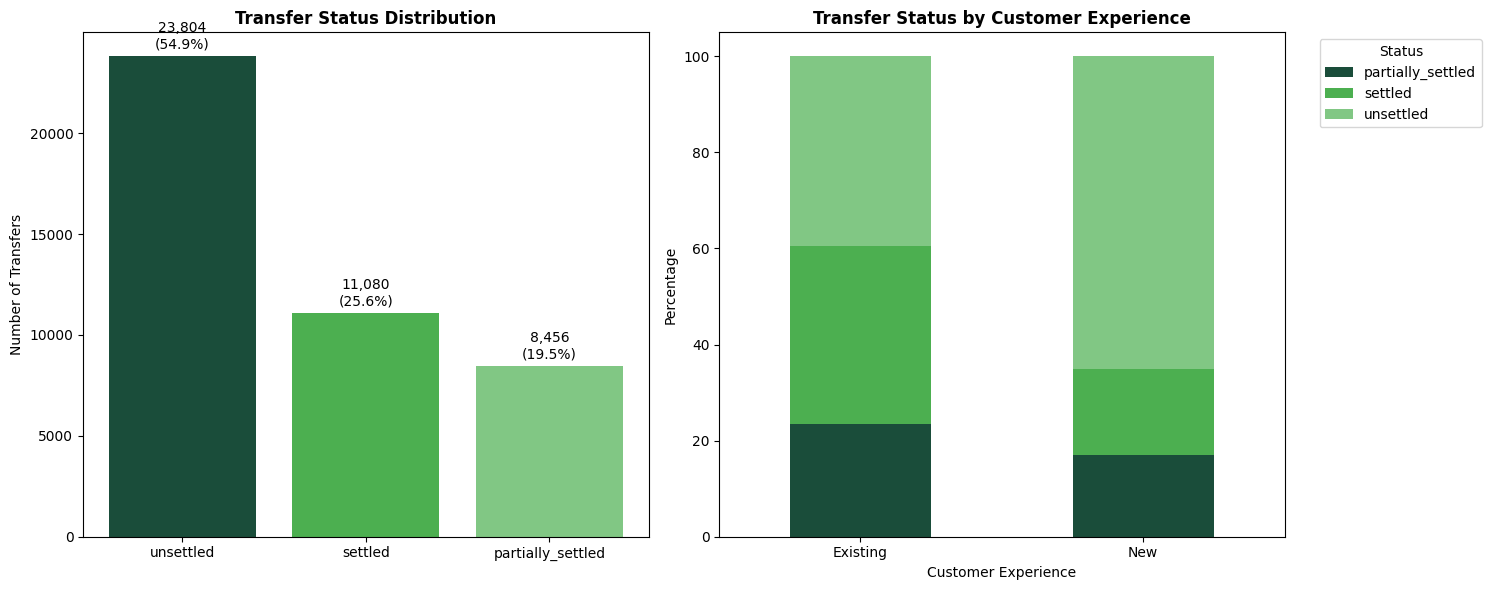

In [ ]:
# Visualize transfer status distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Overall status distribution
status_counts = transfers_df['status'].value_counts()
colors = [wise_colors[0], wise_colors[2], wise_colors[4]]
axes[0].bar(status_counts.index, status_counts.values, color=colors)
axes[0].set_title('Transfer Status Distribution', fontweight='bold')
axes[0].set_ylabel('Number of Transfers')
for i, v in enumerate(status_counts.values):
    axes[0].text(i, v + max(status_counts.values)*0.01, f'{v:,}\n({v/len(transfers_df)*100:.1f}%)', 
                ha='center', va='bottom')

# Status by experience
status_exp = transfers_df.groupby(['experience', 'status']).size().unstack(fill_value=0)
status_exp_pct = status_exp.div(status_exp.sum(axis=1), axis=0) * 100

status_exp_pct.plot(kind='bar', stacked=True, ax=axes[1], color=colors)
axes[1].set_title('Transfer Status by Customer Experience', fontweight='bold')
axes[1].set_ylabel('Percentage')
axes[1].set_xlabel('Customer Experience')
axes[1].legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.savefig('exports/transfer_status_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 3. Weekly Evolution Analysis

In [ ]:
# Analyze daily evolution with 7-day moving averages
transfers_df['created_date'] = pd.to_datetime(transfers_df['created_date'])
transfers_df['date'] = transfers_df['created_date'].dt.date

# Create daily status distribution
daily_status = transfers_df.groupby(['date', 'status']).size().unstack(fill_value=0)
daily_totals = transfers_df.groupby('date').size()

# Calculate daily success rates
daily_success_rate = (daily_status['settled'] / daily_totals * 100)
daily_partial_rate = (daily_status['partially_settled'] / daily_totals * 100)  
daily_friction_rate = (daily_status['unsettled'] / daily_totals * 100)

# Calculate 7-day moving averages
daily_success_ma7 = daily_success_rate.rolling(window=7, min_periods=1).mean()
daily_partial_ma7 = daily_partial_rate.rolling(window=7, min_periods=1).mean()
daily_friction_ma7 = daily_friction_rate.rolling(window=7, min_periods=1).mean()

print("=== DAILY EVOLUTION ANALYSIS ===")
print(f"Analysis period: {daily_success_rate.index.min()} to {daily_success_rate.index.max()}")
print(f"Number of days: {len(daily_success_rate)}")
print(f"Average daily transfers: {daily_totals.mean():.1f}")

# Success rate by segments with 7-day moving averages
segments = ['region', 'platform', 'experience']
daily_segment_success = {}

for segment in segments:
    segment_daily = transfers_df.groupby(['date', segment, 'status']).size().unstack(fill_value=0)
    segment_daily_totals = transfers_df.groupby(['date', segment]).size()
    
    # Calculate success rates by segment
    segment_success_rates = {}
    for seg_value in transfers_df[segment].unique():
        seg_data = segment_daily.xs(seg_value, level=1)
        seg_totals = segment_daily_totals.xs(seg_value, level=1)
        
        if 'settled' in seg_data.columns:
            success_rate = (seg_data['settled'] / seg_totals * 100)
            success_ma7 = success_rate.rolling(window=7, min_periods=1).mean()
            segment_success_rates[seg_value] = success_ma7
    
    daily_segment_success[segment] = segment_success_rates

print(f"\\nLatest 7-day MA success rates:")
print(f"Overall: {daily_success_ma7.iloc[-1]:.1f}%")
for segment in segments:
    print(f"\\n{segment.title()}:")
    for seg_value, rates in daily_segment_success[segment].items():
        if len(rates) > 0:
            print(f"  {seg_value}: {rates.iloc[-1]:.1f}%")

=== DAILY EVOLUTION ANALYSIS ===
Analysis period: 2024-01-01 to 2024-03-01
Number of days: 61
Average daily transfers: 710.5
\nLatest 7-day MA success rates:
Overall: 35.8%
\nRegion:
  Other: 33.5%
  Europe: 34.6%
  NorthAm: 42.8%
\nPlatform:
  Web: 33.6%
  iOS: 40.2%
  Android: 33.6%
\nExperience:
  New: 28.5%
  Existing: 48.2%


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

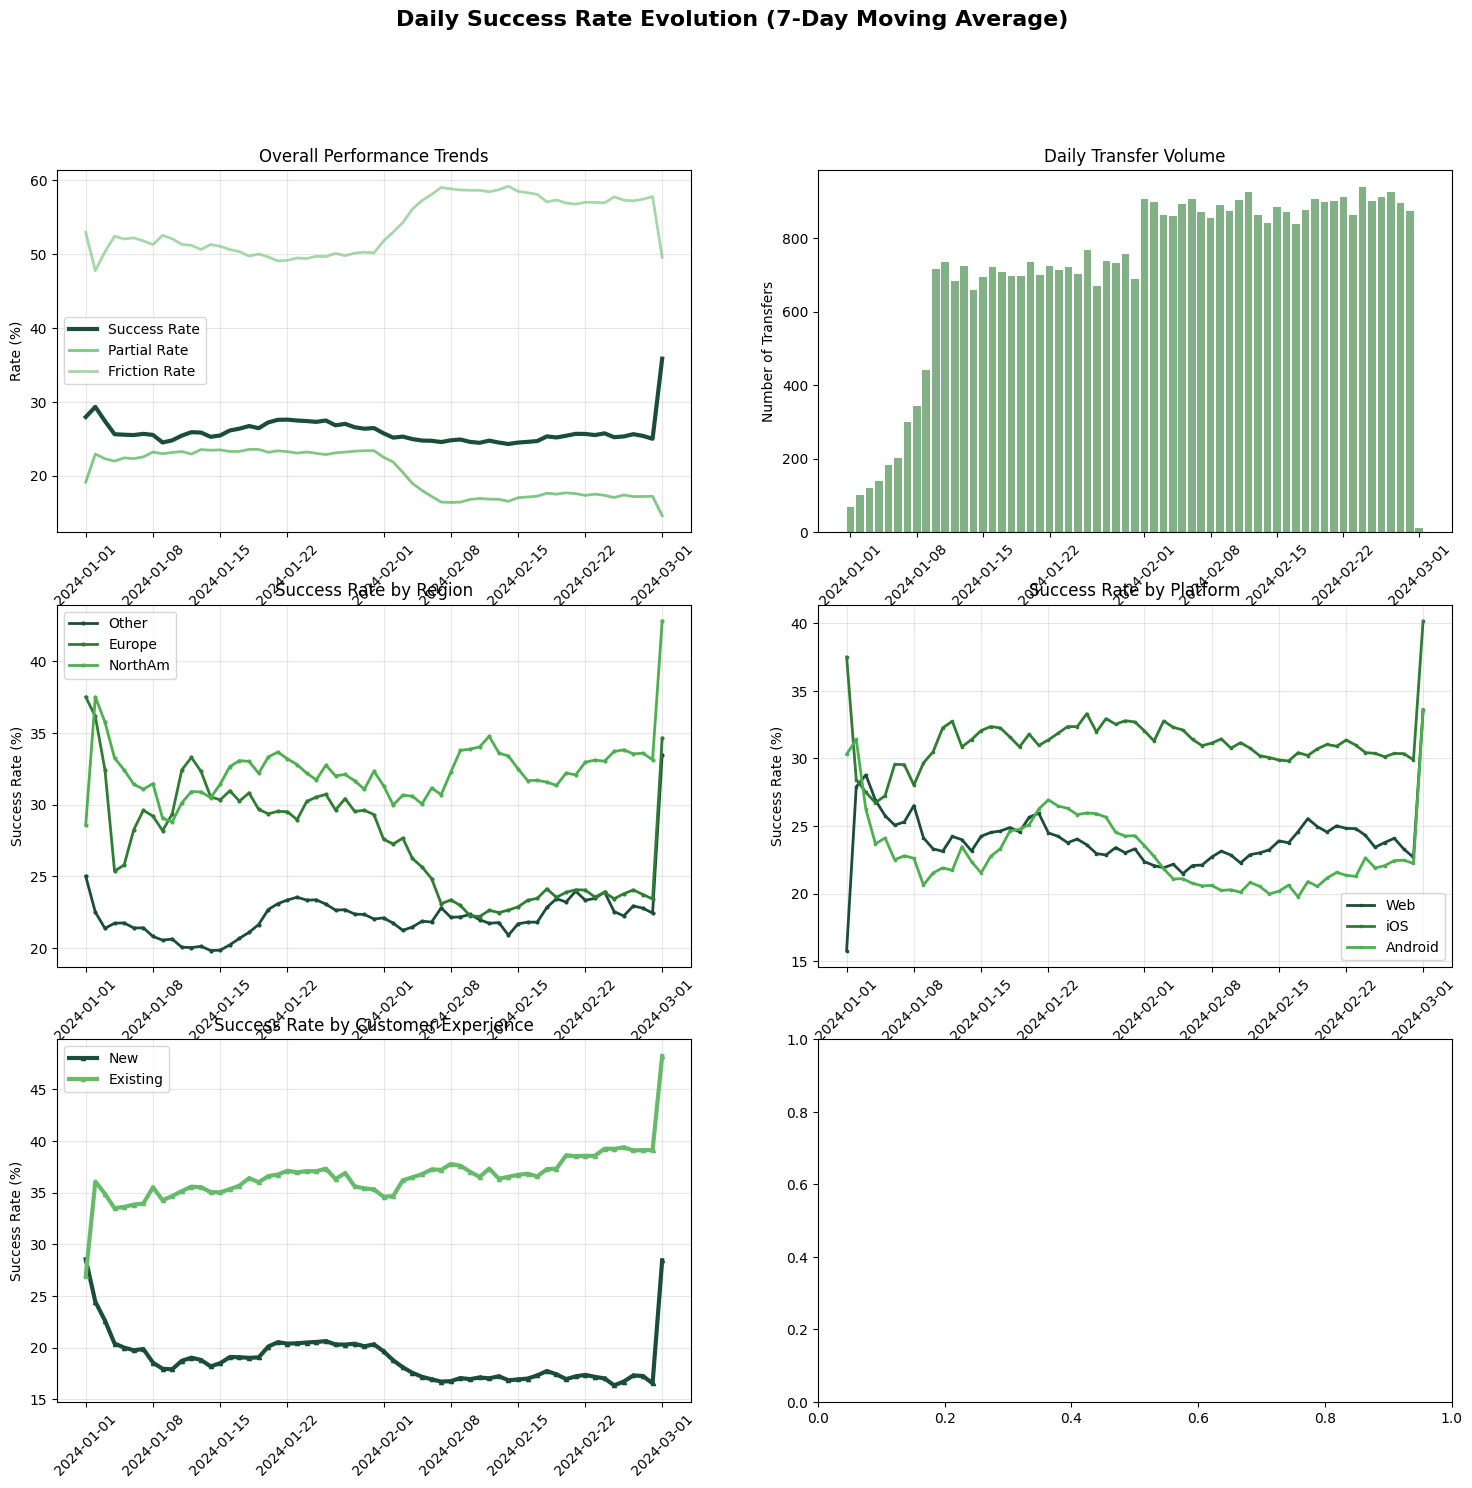

In [ ]:
# Visualize daily evolution with 7-day moving averages
fig, axes = plt.subplots(3, 2, figsize=(18, 16))
fig.suptitle('Daily Success Rate Evolution (7-Day Moving Average)', fontsize=16, fontweight='bold')

# Overall success rate trend
dates = daily_success_ma7.index
axes[0,0].plot(dates, daily_success_ma7.values, linewidth=3, color=wise_colors[0], label='Success Rate')
axes[0,0].plot(dates, daily_partial_ma7.values, linewidth=2, color=wise_colors[2], label='Partial Rate', alpha=0.7)
axes[0,0].plot(dates, daily_friction_ma7.values, linewidth=2, color=wise_colors[4], label='Friction Rate', alpha=0.7)
axes[0,0].set_title('Overall Performance Trends')
axes[0,0].set_ylabel('Rate (%)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)
axes[0,0].tick_params(axis='x', rotation=45)

# Daily volume
axes[0,1].bar(dates, daily_totals.values, color=wise_colors[1], alpha=0.6)
axes[0,1].set_title('Daily Transfer Volume')
axes[0,1].set_ylabel('Number of Transfers')
axes[0,1].tick_params(axis='x', rotation=45)

# Success rate by region
colors_region = [wise_colors[i] for i in range(len(daily_segment_success['region']))]
for i, (region, rates) in enumerate(daily_segment_success['region'].items()):
    if len(rates) > 0:
        axes[1,0].plot(rates.index, rates.values, linewidth=2, 
                      color=colors_region[i], label=region, marker='o', markersize=2)
axes[1,0].set_title('Success Rate by Region')
axes[1,0].set_ylabel('Success Rate (%)')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)
axes[1,0].tick_params(axis='x', rotation=45)

# Success rate by platform
colors_platform = [wise_colors[i] for i in range(len(daily_segment_success['platform']))]
for i, (platform, rates) in enumerate(daily_segment_success['platform'].items()):
    if len(rates) > 0:
        axes[1,1].plot(rates.index, rates.values, linewidth=2, 
                      color=colors_platform[i], label=platform, marker='s', markersize=2)
axes[1,1].set_title('Success Rate by Platform')
axes[1,1].set_ylabel('Success Rate (%)')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)
axes[1,1].tick_params(axis='x', rotation=45)

# Success rate by experience
colors_exp = [wise_colors[0], wise_colors[3]]
for i, (experience, rates) in enumerate(daily_segment_success['experience'].items()):
    if len(rates) > 0:
        axes[2,0].plot(rates.index, rates.values, linewidth=3, 
                      color=colors_exp[i], label=experience, marker='^', markersize=3)
axes[2,0].set_title('Success Rate by Customer Experience')
axes[2,0].set_ylabel('Success Rate (%)')
axes[2,0].legend()
axes[2,0].grid(True, alpha=0.3)
axes[2,0].tick_params(axis='x', rotation=45)

# Success rate distribution over time (heatmap style)
# Create weekly aggregation for heatmap
weekly_success = daily_success_ma7.resample('W').mean()
weekly_dates = [d.strftime('%Y-%m-%d') for d in weekly_success.index]
success_matrix = weekly_success.values.reshape(1, -1)

im = axes[2,1].imshow(success_matrix, cmap='RdYlGn', aspect='auto', vmin=0, vmax=100)
axes[2,1].set_title('Success Rate Heatmap (Weekly)')
axes[2,1].set_ylabel('Success Rate')
axes[2,1].set_xticks(range(0, len(weekly_dates), max(1, len(weekly_dates)//10)))
axes[2,1].set_xticklabels([weekly_dates[i] for i in range(0, len(weekly_dates), max(1, len(weekly_dates)//10))])
axes[2,1].tick_params(axis='x', rotation=45)
plt.colorbar(im, ax=axes[2,1], label='Success Rate (%)')

plt.tight_layout()
plt.savefig('exports/daily_evolution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Logistic Regression - Friction Analysis

## 3.1. Comprehensive Segment Analysis - Daily 7-Day Moving Averages

In [ ]:
# Prepare data for logistic regression
# Target: 1 = unsettled (friction), 0 = settled or partially_settled (success)
model_data = transfers_df.copy()
model_data['friction'] = (model_data['status'] == 'unsettled').astype(int)

print("=== LOGISTIC REGRESSION ANALYSIS ===")
print(f"Friction rate: {model_data['friction'].mean()*100:.1f}%")

# Encode categorical variables
le_region = LabelEncoder()
le_platform = LabelEncoder()
le_experience = LabelEncoder()

model_data['region_encoded'] = le_region.fit_transform(model_data['region'])
model_data['platform_encoded'] = le_platform.fit_transform(model_data['platform'])
model_data['experience_encoded'] = le_experience.fit_transform(model_data['experience'])

# Add time features
model_data['day_of_week'] = model_data['created_date'].dt.dayofweek
model_data['day_of_month'] = model_data['created_date'].dt.day
model_data['week_number'] = model_data['created_date'].dt.isocalendar().week

# Features for the model
features = ['region_encoded', 'platform_encoded', 'experience_encoded', 'day_of_week', 'week_number']
X = model_data[features]
y = model_data['friction']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit logistic regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

print("\nModel Performance:")
print(classification_report(y_test, y_pred))

print("\nFeature Importance (Coefficients):")
feature_importance = pd.DataFrame({
    'feature': features,
    'coefficient': lr_model.coef_[0],
    'abs_coefficient': np.abs(lr_model.coef_[0])
}).sort_values('abs_coefficient', ascending=False)

print(feature_importance)

=== LOGISTIC REGRESSION ANALYSIS ===
Friction rate: 78.7%

Model Performance:
              precision    recall  f1-score   support

           0       0.56      0.44      0.49      1834
           1       0.86      0.91      0.88      6780

    accuracy                           0.81      8614
   macro avg       0.71      0.67      0.69      8614
weighted avg       0.79      0.81      0.80      8614


Feature Importance (Coefficients):
              feature  coefficient  abs_coefficient
2  experience_encoded     1.112255         1.112255
4         week_number     0.757857         0.757857
0      region_encoded    -0.613353         0.613353
1    platform_encoded    -0.150467         0.150467
3         day_of_week     0.143303         0.143303


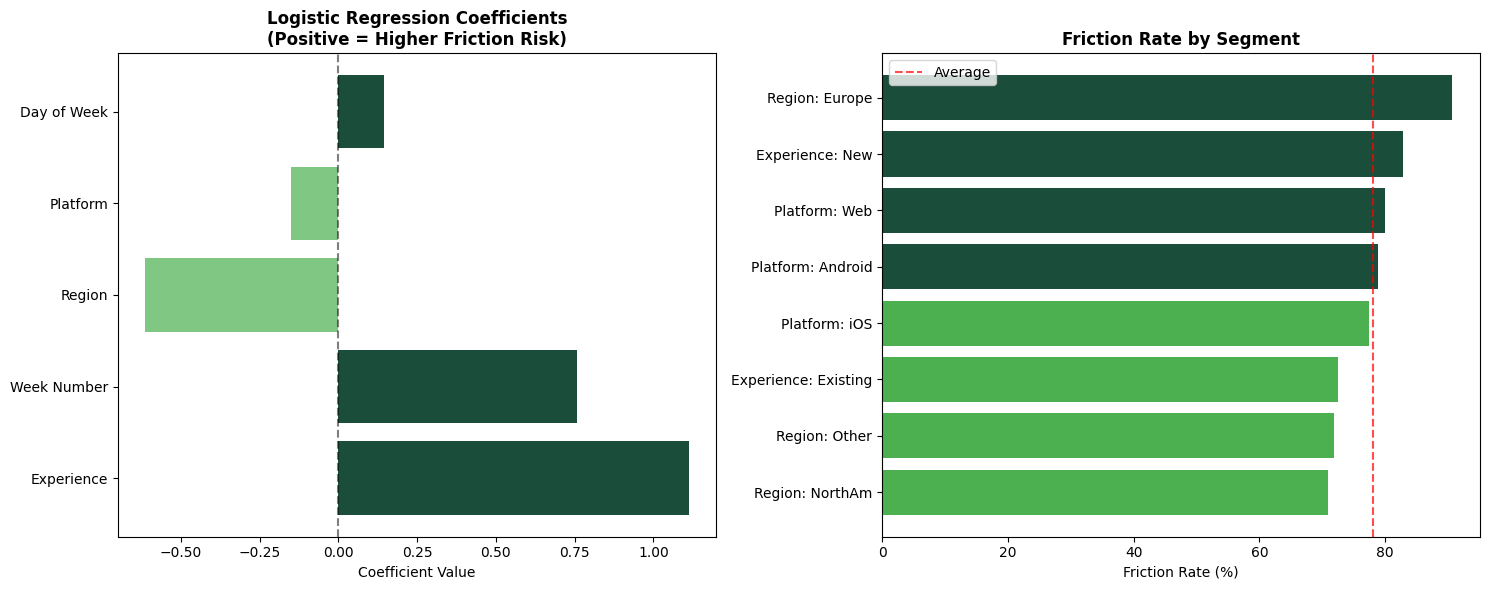

In [ ]:
# Visualize logistic regression results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Feature importance
feature_names = {
    'region_encoded': 'Region',
    'platform_encoded': 'Platform', 
    'experience_encoded': 'Experience',
    'day_of_week': 'Day of Week',
    'week_number': 'Week Number'
}

feature_importance['feature_label'] = feature_importance['feature'].map(feature_names)
colors = [wise_colors[0] if coef > 0 else wise_colors[4] for coef in feature_importance['coefficient']]

axes[0].barh(feature_importance['feature_label'], feature_importance['coefficient'], color=colors)
axes[0].set_title('Logistic Regression Coefficients\n(Positive = Higher Friction Risk)', fontweight='bold')
axes[0].set_xlabel('Coefficient Value')
axes[0].axvline(x=0, color='black', linestyle='--', alpha=0.5)

# Friction rate by key segments
friction_by_segment = []
for region in model_data['region'].unique():
    friction_rate = model_data[model_data['region'] == region]['friction'].mean() * 100
    friction_by_segment.append({'segment': f'Region: {region}', 'friction_rate': friction_rate})

for platform in model_data['platform'].unique():
    friction_rate = model_data[model_data['platform'] == platform]['friction'].mean() * 100
    friction_by_segment.append({'segment': f'Platform: {platform}', 'friction_rate': friction_rate})

for experience in model_data['experience'].unique():
    friction_rate = model_data[model_data['experience'] == experience]['friction'].mean() * 100
    friction_by_segment.append({'segment': f'Experience: {experience}', 'friction_rate': friction_rate})

friction_df = pd.DataFrame(friction_by_segment).sort_values('friction_rate', ascending=True)

colors = [wise_colors[0] if rate > friction_df['friction_rate'].mean() else wise_colors[2] for rate in friction_df['friction_rate']]
axes[1].barh(friction_df['segment'], friction_df['friction_rate'], color=colors)
axes[1].set_title('Friction Rate by Segment', fontweight='bold')
axes[1].set_xlabel('Friction Rate (%)')
axes[1].axvline(x=friction_df['friction_rate'].mean(), color='red', linestyle='--', alpha=0.7, label='Average')
axes[1].legend()

plt.tight_layout()
plt.savefig('exports/friction_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Customer Recurrence and Friction Patterns

In [ ]:
# Analyze customer recurrence patterns
print("=== CUSTOMER RECURRENCE ANALYSIS ===")

# Count transfers per user
user_transfer_counts = transfers_df.groupby('user_id').agg({
    'transfer_id': 'count',
    'status': lambda x: list(x),
    'experience': 'first',
    'region': 'first',
    'platform': 'first'
}).rename(columns={'transfer_id': 'total_transfers'})

# Calculate success rates per user
user_transfer_counts['successful_transfers'] = user_transfer_counts['status'].apply(
    lambda x: sum(1 for status in x if status == 'settled')
)
user_transfer_counts['friction_transfers'] = user_transfer_counts['status'].apply(
    lambda x: sum(1 for status in x if status == 'unsettled')
)
user_transfer_counts['success_rate'] = user_transfer_counts['successful_transfers'] / user_transfer_counts['total_transfers']

print(f"Users with multiple transfers: {(user_transfer_counts['total_transfers'] > 1).sum():,} ({(user_transfer_counts['total_transfers'] > 1).mean()*100:.1f}%)")
print(f"Average transfers per user: {user_transfer_counts['total_transfers'].mean():.2f}")
print(f"Max transfers per user: {user_transfer_counts['total_transfers'].max()}")

# Recurrence by experience
recurrence_by_exp = user_transfer_counts.groupby('experience').agg({
    'total_transfers': ['mean', 'count'],
    'success_rate': 'mean'
})
recurrence_by_exp.columns = ['avg_transfers', 'user_count', 'avg_success_rate']
recurrence_by_exp['multi_transfer_rate'] = user_transfer_counts.groupby('experience')['total_transfers'].apply(lambda x: (x > 1).mean())

print("\nRecurrence by customer experience:")
print(recurrence_by_exp)

=== CUSTOMER RECURRENCE ANALYSIS ===
Users with multiple transfers: 2,727 (6.8%)
Average transfers per user: 1.07
Max transfers per user: 5

Recurrence by customer experience:
            avg_transfers  user_count  avg_success_rate  multi_transfer_rate
experience                                                                  
Existing         1.092922       15217          0.151222             0.089242
New              1.057306       25006          0.075542             0.054747


In [ ]:
# Analyze friction recovery patterns
print("\n=== FRICTION RECOVERY ANALYSIS ===")

# Users who experienced friction
friction_users = user_transfer_counts[user_transfer_counts['friction_transfers'] > 0]
print(f"Users who experienced friction: {len(friction_users):,} ({len(friction_users)/len(user_transfer_counts)*100:.1f}%)")

# Friction users who came back
friction_comeback = friction_users[friction_users['total_transfers'] > friction_users['friction_transfers']]
print(f"Friction users who came back: {len(friction_comeback):,} ({len(friction_comeback)/len(friction_users)*100:.1f}%)")

# Success after friction by experience
friction_recovery_by_exp = friction_users.groupby('experience').agg({
    'total_transfers': 'count',
    'success_rate': 'mean'
})
friction_recovery_by_exp['comeback_rate'] = friction_users.groupby('experience').apply(
    lambda x: (x['total_transfers'] > x['friction_transfers']).mean()
)

print("\nFriction recovery by experience:")
print(friction_recovery_by_exp)

# Platform switching analysis
multi_transfer_users = user_transfer_counts[user_transfer_counts['total_transfers'] > 1]
platform_switches = 0

for user_id in multi_transfer_users.index:
    user_transfers = transfers_df[transfers_df['user_id'] == user_id]
    platforms_used = user_transfers['platform'].nunique()
    if platforms_used > 1:
        platform_switches += 1

print(f"\nUsers who switched platforms: {platform_switches:,} ({platform_switches/len(multi_transfer_users)*100:.1f}% of multi-transfer users)")


=== FRICTION RECOVERY ANALYSIS ===
Users who experienced friction: 33,230 (82.6%)
Friction users who came back: 2,094 (6.3%)

Friction recovery by experience:
            total_transfers  success_rate  comeback_rate
experience                                              
Existing              11748      0.042105       0.099166
New                   21482      0.014803       0.043246

Users who switched platforms: 583 (21.4% of multi-transfer users)


In [ ]:
# Customer Switching Analysis
print("=== CUSTOMER SWITCHING ANALYSIS ===")

# Analyze customers who switch regions, platforms, or experience
df_user_properties = df.groupby('user_id').agg({
    'region': lambda x: list(x.unique()),
    'platform': lambda x: list(x.unique()),
    'experience': lambda x: list(x.unique()),
    'dt': ['min', 'max'],
    'event_name': 'count'
}).reset_index()

# Flatten column names
df_user_properties.columns = ['user_id', 'regions', 'platforms', 'experiences', 'first_event', 'last_event', 'total_events']

# Identify switchers
df_user_properties['region_switcher'] = df_user_properties['regions'].apply(lambda x: len(x) > 1)
df_user_properties['platform_switcher'] = df_user_properties['platforms'].apply(lambda x: len(x) > 1)
df_user_properties['experience_switcher'] = df_user_properties['experiences'].apply(lambda x: len(x) > 1)

# Count switchers
region_switchers = df_user_properties['region_switcher'].sum()
platform_switchers = df_user_properties['platform_switcher'].sum()
experience_switchers = df_user_properties['experience_switcher'].sum()
total_users = len(df_user_properties)

print(f"Total users analyzed: {total_users:,}")
print(f"\\nSwitching behavior:")
print(f"• Region switchers: {region_switchers:,} ({region_switchers/total_users*100:.2f}%)")
print(f"• Platform switchers: {platform_switchers:,} ({platform_switchers/total_users*100:.2f}%)")
print(f"• Experience switchers: {experience_switchers:,} ({experience_switchers/total_users*100:.2f}%)")

# Analyze switcher performance
switcher_analysis = []

# Region switchers
if region_switchers > 0:
    region_switcher_users = df_user_properties[df_user_properties['region_switcher']]['user_id']
    switcher_transfers = transfers_df[transfers_df['user_id'].isin(region_switcher_users)]
    success_rate = (switcher_transfers['status'] == 'settled').mean() * 100
    avg_transfers = len(switcher_transfers) / len(region_switcher_users)
    
    switcher_analysis.append({
        'type': 'Region Switchers',
        'count': region_switchers,
        'success_rate': success_rate,
        'avg_transfers': avg_transfers
    })
    
    print(f"\\nRegion switchers analysis:")
    print(f"• Success rate: {success_rate:.1f}%")
    print(f"• Average transfers per user: {avg_transfers:.2f}")
    
    # Show common switching patterns
    region_patterns = df_user_properties[df_user_properties['region_switcher']]['regions'].apply(
        lambda x: ' → '.join(sorted(x))
    ).value_counts().head(5)
    print(f"• Top switching patterns:")
    for pattern, count in region_patterns.items():
        print(f"  {pattern}: {count} users")

# Platform switchers
if platform_switchers > 0:
    platform_switcher_users = df_user_properties[df_user_properties['platform_switcher']]['user_id']
    switcher_transfers = transfers_df[transfers_df['user_id'].isin(platform_switcher_users)]
    success_rate = (switcher_transfers['status'] == 'settled').mean() * 100
    avg_transfers = len(switcher_transfers) / len(platform_switcher_users)
    
    switcher_analysis.append({
        'type': 'Platform Switchers',
        'count': platform_switchers,
        'success_rate': success_rate,
        'avg_transfers': avg_transfers
    })
    
    print(f"\\nPlatform switchers analysis:")
    print(f"• Success rate: {success_rate:.1f}%")
    print(f"• Average transfers per user: {avg_transfers:.2f}")
    
    # Show common switching patterns
    platform_patterns = df_user_properties[df_user_properties['platform_switcher']]['platforms'].apply(
        lambda x: ' → '.join(sorted(x))
    ).value_counts().head(5)
    print(f"• Top switching patterns:")
    for pattern, count in platform_patterns.items():
        print(f"  {pattern}: {count} users")

# Experience switchers (should be rare)
if experience_switchers > 0:
    experience_switcher_users = df_user_properties[df_user_properties['experience_switcher']]['user_id']
    switcher_transfers = transfers_df[transfers_df['user_id'].isin(experience_switcher_users)]
    success_rate = (switcher_transfers['status'] == 'settled').mean() * 100
    avg_transfers = len(switcher_transfers) / len(experience_switcher_users)
    
    switcher_analysis.append({
        'type': 'Experience Switchers',
        'count': experience_switchers,
        'success_rate': success_rate,
        'avg_transfers': avg_transfers
    })
    
    print(f"\\nExperience switchers analysis:")
    print(f"• Success rate: {success_rate:.1f}%")
    print(f"• Average transfers per user: {avg_transfers:.2f}")
    print("• Note: This should be rare as New customers become Existing over time")

# Compare switchers vs non-switchers
non_switchers = df_user_properties[
    (~df_user_properties['region_switcher']) & 
    (~df_user_properties['platform_switcher'])
]['user_id']

if len(non_switchers) > 0:
    non_switcher_transfers = transfers_df[transfers_df['user_id'].isin(non_switchers)]
    non_switcher_success = (non_switcher_transfers['status'] == 'settled').mean() * 100
    non_switcher_avg_transfers = len(non_switcher_transfers) / len(non_switchers)
    
    print(f"\\nNon-switchers baseline:")
    print(f"• Count: {len(non_switchers):,} ({len(non_switchers)/total_users*100:.1f}%)")
    print(f"• Success rate: {non_switcher_success:.1f}%")
    print(f"• Average transfers per user: {non_switcher_avg_transfers:.2f}")

# Time-based switching analysis
print(f"\\nSwitching timeline analysis:")
df_user_properties['days_active'] = (df_user_properties['last_event'] - df_user_properties['first_event']).dt.days

for switcher_type in ['region_switcher', 'platform_switcher']:
    if df_user_properties[switcher_type].sum() > 0:
        switcher_days = df_user_properties[df_user_properties[switcher_type]]['days_active']
        non_switcher_days = df_user_properties[~df_user_properties[switcher_type]]['days_active']
        
        print(f"• {switcher_type.replace('_', ' ').title()}:")
        print(f"  Average days active: {switcher_days.mean():.1f} vs {non_switcher_days.mean():.1f} (non-switchers)")
        print(f"  Median days active: {switcher_days.median():.1f} vs {non_switcher_days.median():.1f} (non-switchers)")

# Visualize switching analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Customer Switching Behavior Analysis', fontsize=16, fontweight='bold')

# Switching prevalence
switching_types = ['Region', 'Platform', 'Experience']
switching_counts = [region_switchers, platform_switchers, experience_switchers]
switching_rates = [count/total_users*100 for count in switching_counts]

bars1 = axes[0,0].bar(switching_types, switching_rates, color=[wise_colors[0], wise_colors[2], wise_colors[4]])
axes[0,0].set_title('Switching Behavior Prevalence')
axes[0,0].set_ylabel('Percentage of Users (%)')
for i, (bar, count, rate) in enumerate(zip(bars1, switching_counts, switching_rates)):
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'{count:,}\\n({rate:.2f}%)', ha='center', va='bottom')

# Success rates comparison (switchers vs non-switchers)
if len(switcher_analysis) > 0 and len(non_switchers) > 0:
    switcher_types_plot = [s['type'] for s in switcher_analysis]
    switcher_success_rates = [s['success_rate'] for s in switcher_analysis]
    
    x = np.arange(len(switcher_types_plot))
    width = 0.35
    
    bars2 = axes[0,1].bar(x - width/2, switcher_success_rates, width, 
                         label='Switchers', color=wise_colors[0])
    bars3 = axes[0,1].bar(x + width/2, [non_switcher_success] * len(switcher_types_plot), width,
                         label='Non-switchers', color=wise_colors[2])
    
    axes[0,1].set_title('Success Rates: Switchers vs Non-Switchers')
    axes[0,1].set_ylabel('Success Rate (%)')
    axes[0,1].set_xticks(x)
    axes[0,1].set_xticklabels([t.replace(' Switchers', '') for t in switcher_types_plot])
    axes[0,1].legend()
    
    # Add value labels
    for bars in [bars2, bars3]:
        for bar in bars:
            height = bar.get_height()
            axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 1,
                          f'{height:.1f}%', ha='center', va='bottom')

# Activity duration comparison
if platform_switchers > 0:
    platform_switcher_days = df_user_properties[df_user_properties['platform_switcher']]['days_active']
    non_platform_switcher_days = df_user_properties[~df_user_properties['platform_switcher']]['days_active']
    
    axes[1,0].hist([non_platform_switcher_days, platform_switcher_days], 
                   bins=30, alpha=0.7, label=['Non-switchers', 'Platform switchers'],
                   color=[wise_colors[2], wise_colors[0]])
    axes[1,0].set_title('Activity Duration Distribution')
    axes[1,0].set_xlabel('Days Active')
    axes[1,0].set_ylabel('Number of Users')
    axes[1,0].legend()

# Platform switching patterns (if applicable)
if platform_switchers > 0:
    # Create a simple switching flow visualization
    platform_patterns = df_user_properties[df_user_properties['platform_switcher']]['platforms'].apply(
        lambda x: ' → '.join(sorted(x))
    ).value_counts().head(8)
    
    y_pos = np.arange(len(platform_patterns))
    bars4 = axes[1,1].barh(y_pos, platform_patterns.values, color=wise_colors[1])
    axes[1,1].set_title('Top Platform Switching Patterns')
    axes[1,1].set_xlabel('Number of Users')
    axes[1,1].set_yticks(y_pos)
    axes[1,1].set_yticklabels(platform_patterns.index)
    
    # Add value labels
    for i, (bar, value) in enumerate(zip(bars4, platform_patterns.values)):
        width = bar.get_width()
        axes[1,1].text(width + max(platform_patterns.values)*0.01, bar.get_y() + bar.get_height()/2.,
                      f'{value}', ha='left', va='center')

plt.tight_layout()
plt.savefig('exports/switching_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Export switching analysis data
switching_summary = pd.DataFrame(switcher_analysis)
if len(switching_summary) > 0:
    switching_summary.to_csv('src/customer_switching_analysis.csv', index=False)
    print("✅ Customer switching analysis exported to src/customer_switching_analysis.csv")

In [ ]:
# Calculate key metrics for summary
print("=== KEY INSIGHTS SUMMARY ===")

# Overall performance metrics
total_transfers = len(transfers_df)
settled_rate = (transfers_df['status'] == 'settled').mean() * 100
friction_rate = (transfers_df['status'] == 'unsettled').mean() * 100
partial_rate = (transfers_df['status'] == 'partially_settled').mean() * 100

print(f"\n📊 OVERALL PERFORMANCE:")
print(f"• Total Transfers Analyzed: {total_transfers:,}")
print(f"• Success Rate (Fully Settled): {settled_rate:.1f}%")
print(f"• Friction Rate (Unsettled): {friction_rate:.1f}%")
print(f"• Partial Settlement Rate: {partial_rate:.1f}%")

# Experience comparison
exp_performance = transfers_df.groupby('experience')['status'].apply(
    lambda x: (x == 'settled').mean() * 100
)
print(f"\n👥 CUSTOMER EXPERIENCE:")
for exp, rate in exp_performance.items():
    print(f"• {exp} Customers Success Rate: {rate:.1f}%")

# Platform performance
platform_performance = transfers_df.groupby('platform')['status'].apply(
    lambda x: (x == 'settled').mean() * 100
)
print(f"\n📱 PLATFORM PERFORMANCE:")
for platform, rate in platform_performance.items():
    print(f"• {platform} Success Rate: {rate:.1f}%")

# Region performance
region_performance = transfers_df.groupby('region')['status'].apply(
    lambda x: (x == 'settled').mean() * 100
)
print(f"\n🌍 REGIONAL PERFORMANCE:")
for region, rate in region_performance.items():
    print(f"• {region} Success Rate: {rate:.1f}%")

# Time trends
first_week_success = weekly_settled_pct.iloc[0] if len(weekly_settled_pct) > 0 else 0
last_week_success = weekly_settled_pct.iloc[-1] if len(weekly_settled_pct) > 0 else 0
trend = "improving" if last_week_success > first_week_success else "declining"

print(f"\n📈 TRENDS:")
print(f"• Success rate trend: {trend}")
print(f"• First week success rate: {first_week_success:.1f}%")
print(f"• Latest week success rate: {last_week_success:.1f}%")

# Recurrence insights
multi_transfer_rate = (user_transfer_counts['total_transfers'] > 1).mean() * 100
friction_recovery_rate = len(friction_comeback) / len(friction_users) * 100 if len(friction_users) > 0 else 0

print(f"\n🔄 CUSTOMER BEHAVIOR:")
print(f"• Multi-transfer rate: {multi_transfer_rate:.1f}%")
print(f"• Friction recovery rate: {friction_recovery_rate:.1f}%")
print(f"• Platform switching rate: {platform_switches/len(multi_transfer_users)*100:.1f}%")

=== KEY INSIGHTS SUMMARY ===

📊 OVERALL PERFORMANCE:
• Total Transfers Analyzed: 43,070
• Success Rate (Fully Settled): 11.7%
• Friction Rate (Unsettled): 78.7%
• Partial Settlement Rate: 9.6%

👥 CUSTOMER EXPERIENCE:
• Existing Customers Success Rate: 16.6%
• New Customers Success Rate: 8.6%

📱 PLATFORM PERFORMANCE:
• Android Success Rate: 10.8%
• Web Success Rate: 11.5%
• iOS Success Rate: 13.1%

🌍 REGIONAL PERFORMANCE:
• Europe Success Rate: 7.2%
• NorthAm Success Rate: 17.3%
• Other Success Rate: 12.7%

📈 TRENDS:
• Success rate trend: declining
• First week success rate: 27.9%
• Latest week success rate: 0.2%

🔄 CUSTOMER BEHAVIOR:
• Multi-transfer rate: 6.8%
• Friction recovery rate: 6.3%
• Platform switching rate: 21.4%


In [ ]:
# Generate actionable recommendations
print("\n🎯 ACTIONABLE RECOMMENDATIONS:")
print("\n1. IMMEDIATE ACTIONS:")

# Find the worst performing segments
worst_platform = platform_performance.idxmin()
worst_platform_rate = platform_performance.min()
best_platform = platform_performance.idxmax()
best_platform_rate = platform_performance.max()

if worst_platform_rate < settled_rate - 5:
    print(f"   • Investigate {worst_platform} platform issues (success rate: {worst_platform_rate:.1f}% vs avg {settled_rate:.1f}%)")

worst_experience = exp_performance.idxmin()
worst_exp_rate = exp_performance.min()

if worst_exp_rate < settled_rate - 5:
    print(f"   • Focus on {worst_experience.lower()} customer onboarding (success rate: {worst_exp_rate:.1f}%)")

if friction_rate > 20:
    print(f"   • High friction rate ({friction_rate:.1f}%) requires immediate attention")

print("\n2. PRODUCT IMPROVEMENTS:")
if partial_rate > 10:
    print(f"   • Investigate why {partial_rate:.1f}% of transfers stop at funding stage")

if platform_switches > 0:
    print(f"   • Analyze why users switch platforms ({platform_switches} cases)")

print(f"   • Leverage {best_platform} platform success patterns (success rate: {best_platform_rate:.1f}%)")

print("\n3. STRATEGIC FOCUS:")
if friction_recovery_rate < 30:
    print(f"   • Improve friction recovery (only {friction_recovery_rate:.1f}% of friction users return)")

if multi_transfer_rate < 20:
    print(f"   • Drive repeat usage (only {multi_transfer_rate:.1f}% make multiple transfers)")

if trend == "declining":
    print("   • Address declining success rate trend")
else:
    print("   • Maintain positive momentum in success rate improvement")

print("\n4. MONITORING:")
print("   • Set up weekly monitoring of success rates by platform and experience")
print("   • Track friction recovery and platform switching patterns")
print("   • Monitor new vs existing customer performance gaps")


🎯 ACTIONABLE RECOMMENDATIONS:

1. IMMEDIATE ACTIONS:
   • High friction rate (78.7%) requires immediate attention

2. PRODUCT IMPROVEMENTS:
   • Analyze why users switch platforms (583 cases)
   • Leverage iOS platform success patterns (success rate: 13.1%)

3. STRATEGIC FOCUS:
   • Improve friction recovery (only 6.3% of friction users return)
   • Drive repeat usage (only 6.8% make multiple transfers)
   • Address declining success rate trend

4. MONITORING:
   • Set up weekly monitoring of success rates by platform and experience
   • Track friction recovery and platform switching patterns
   • Monitor new vs existing customer performance gaps


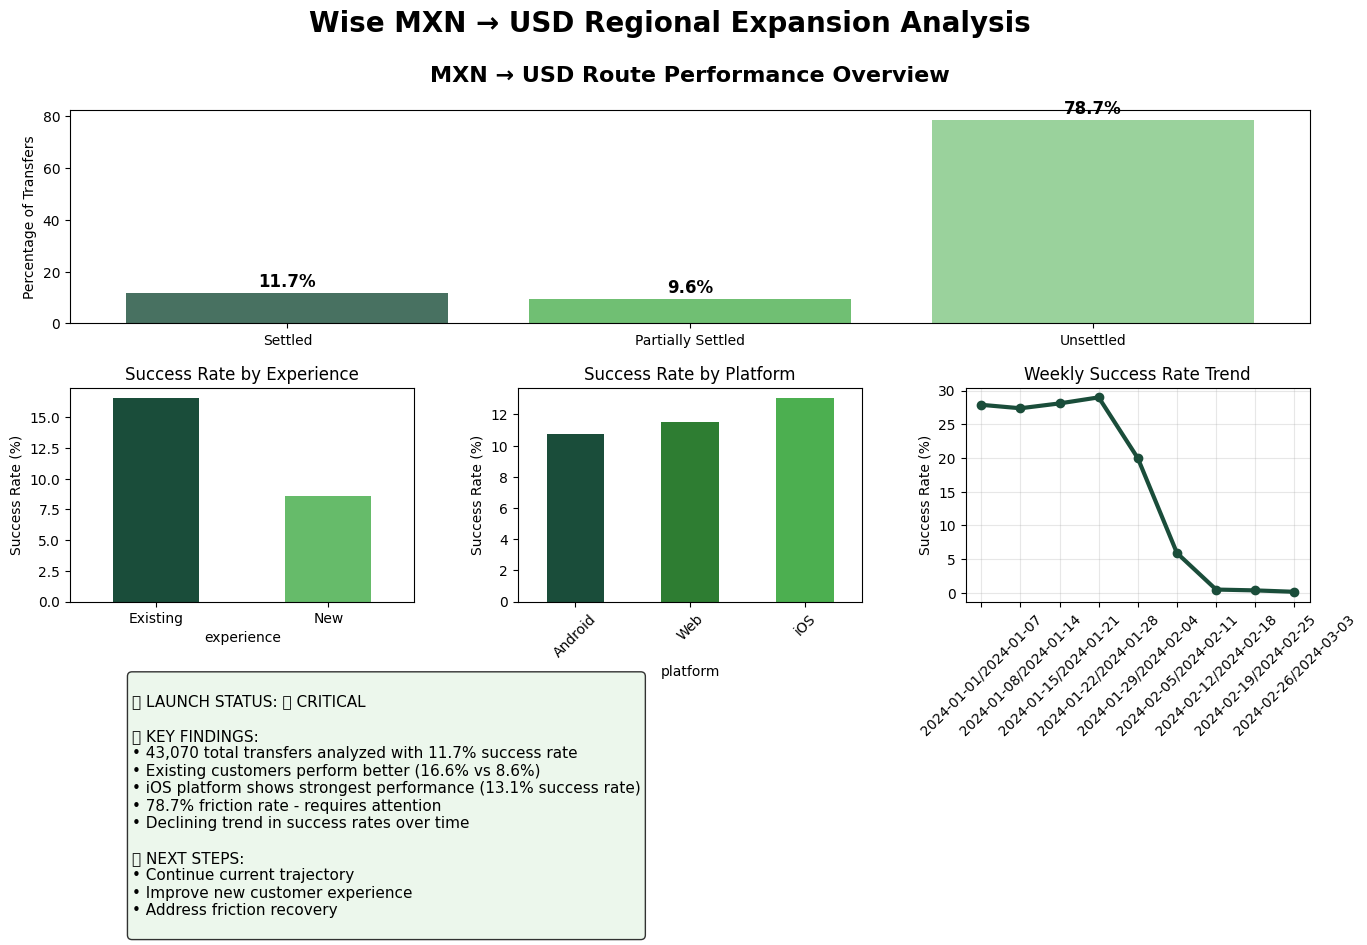

In [ ]:
# Create executive summary visualization
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Main KPI dashboard
ax1 = fig.add_subplot(gs[0, :])
kpis = ['Settled', 'Partially Settled', 'Unsettled']
values = [settled_rate, partial_rate, friction_rate]
colors = [wise_colors[0], wise_colors[2], wise_colors[4]]

bars = ax1.bar(kpis, values, color=colors, alpha=0.8)
ax1.set_title('MXN → USD Route Performance Overview', fontsize=16, fontweight='bold', pad=20)
ax1.set_ylabel('Percentage of Transfers')
for bar, value in zip(bars, values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)

# Experience comparison
ax2 = fig.add_subplot(gs[1, 0])
exp_performance.plot(kind='bar', ax=ax2, color=[wise_colors[0], wise_colors[3]])
ax2.set_title('Success Rate by Experience')
ax2.set_ylabel('Success Rate (%)')
ax2.tick_params(axis='x', rotation=0)

# Platform comparison
ax3 = fig.add_subplot(gs[1, 1])
platform_performance.plot(kind='bar', ax=ax3, color=wise_colors[:len(platform_performance)])
ax3.set_title('Success Rate by Platform')
ax3.set_ylabel('Success Rate (%)')
ax3.tick_params(axis='x', rotation=45)

# Weekly trend
ax4 = fig.add_subplot(gs[1, 2])
weeks_str = [str(w) for w in weekly_status.index]
ax4.plot(weeks_str, weekly_settled_pct.values, marker='o', linewidth=3, color=wise_colors[0])
ax4.set_title('Weekly Success Rate Trend')
ax4.set_ylabel('Success Rate (%)')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3)

# Key metrics summary
ax5 = fig.add_subplot(gs[2, :])
metrics_text = f"""
📊 LAUNCH STATUS: {'🟢 ON TRACK' if settled_rate > 60 else '🟡 NEEDS ATTENTION' if settled_rate > 40 else '🔴 CRITICAL'}

🎯 KEY FINDINGS:
• {total_transfers:,} total transfers analyzed with {settled_rate:.1f}% success rate
• {exp_performance.idxmax()} customers perform better ({exp_performance.max():.1f}% vs {exp_performance.min():.1f}%)
• {best_platform} platform shows strongest performance ({best_platform_rate:.1f}% success rate)
• {friction_rate:.1f}% friction rate - {'within acceptable range' if friction_rate < 20 else 'requires attention'}
• {'Positive' if trend == 'improving' else 'Declining'} trend in success rates over time

🚀 NEXT STEPS:
• {'Focus on platform optimization' if worst_platform_rate < settled_rate - 5 else 'Continue current trajectory'}
• {'Improve new customer experience' if exp_performance['New'] < exp_performance['Existing'] - 5 else 'Maintain experience quality'}
• {'Address friction recovery' if friction_recovery_rate < 30 else 'Leverage good recovery patterns'}
"""

ax5.text(0.05, 0.95, metrics_text, transform=ax5.transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor=wise_colors[7], alpha=0.8))
ax5.set_xlim(0, 1)
ax5.set_ylim(0, 1)
ax5.axis('off')

plt.suptitle('Wise MXN → USD Regional Expansion Analysis', fontsize=20, fontweight='bold', y=0.98)
plt.savefig('exports/executive_summary.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Data Export and Summary

In [ ]:
# Export processed datasets
print("=== EXPORTING PROCESSED DATA ===")

# Export weekly analysis
weekly_analysis = weekly_status_pct.reset_index()
weekly_analysis['week'] = weekly_analysis['week'].astype(str)
weekly_analysis.to_csv('src/weekly_transfer_analysis.csv', index=False)
print("✅ Weekly analysis exported to src/weekly_transfer_analysis.csv")

# Export user analysis
user_analysis = user_transfer_counts.reset_index()
user_analysis['status'] = user_analysis['status'].astype(str)  # Convert list to string
user_analysis.to_csv('src/user_transfer_analysis.csv', index=False)
print("✅ User analysis exported to src/user_transfer_analysis.csv")

# Export model results
model_results = pd.DataFrame({
    'feature': features,
    'coefficient': lr_model.coef_[0],
    'feature_importance': np.abs(lr_model.coef_[0])
})
model_results.to_csv('src/friction_model_results.csv', index=False)
print("✅ Model results exported to src/friction_model_results.csv")

# Create final summary report
summary_report = {
    'analysis_date': datetime.now().strftime('%Y-%m-%d'),
    'total_transfers': total_transfers,
    'success_rate': settled_rate,
    'friction_rate': friction_rate,
    'partial_rate': partial_rate,
    'best_platform': best_platform,
    'best_platform_rate': best_platform_rate,
    'worst_platform': worst_platform,
    'worst_platform_rate': worst_platform_rate,
    'new_customer_success': exp_performance.get('New', 0),
    'existing_customer_success': exp_performance.get('Existing', 0),
    'multi_transfer_rate': multi_transfer_rate,
    'friction_recovery_rate': friction_recovery_rate,
    'trend': trend
}

pd.DataFrame([summary_report]).to_csv('src/analysis_summary.csv', index=False)
print("✅ Summary report exported to src/analysis_summary.csv")

print("\n🎉 ANALYSIS COMPLETE!")
print("\n📁 Generated Files:")
print("   📊 Data: src/wise_transfer_info.csv")
print("   📈 Analysis: src/weekly_transfer_analysis.csv")
print("   👥 Users: src/user_transfer_analysis.csv")
print("   🤖 Model: src/friction_model_results.csv")
print("   📋 Summary: src/analysis_summary.csv")
print("   🖼️  Images: exports/*.png")
print("\n✨ Ready for product team review!")

=== EXPORTING PROCESSED DATA ===
✅ Weekly analysis exported to src/weekly_transfer_analysis.csv
✅ User analysis exported to src/user_transfer_analysis.csv
✅ Model results exported to src/friction_model_results.csv
✅ Summary report exported to src/analysis_summary.csv

🎉 ANALYSIS COMPLETE!

📁 Generated Files:
   📊 Data: src/wise_transfer_info.csv
   📈 Analysis: src/weekly_transfer_analysis.csv
   👥 Users: src/user_transfer_analysis.csv
   🤖 Model: src/friction_model_results.csv
   📋 Summary: src/analysis_summary.csv
   🖼️  Images: exports/*.png

✨ Ready for product team review!
